In [1]:
import efel

from bluepy.v2 import Simulation,Circuit,Cell

from bluepy.v2.enums import Synapse

from os import path

import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns

import h5py
import pickle


In [2]:
#Convert reports from bbp format to h5
#bash utils/step1_convert_bbp2h5.sh OutputRoot

#bash utils/iter_efelAll.sh
#bash analysis/iter_atp_rate.sh  
#bash analysis/iter_ina_500.sh


In [2]:
circuit_f = '/gpfs/bbp.cscs.ch/project/proj64/circuits/O1.v6a/20181207/CircuitConfig'

c = Circuit(circuit_f)
mc2_cells = c.cells.get({'$target': 'mc2_Column'}, properties=[Cell.X, Cell.Y, Cell.Z,Cell.SYNAPSE_CLASS,Cell.LAYER,Cell.ETYPE,Cell.MTYPE])
mc2gidsids = {k: v for k, v in enumerate(mc2_cells.index)}


In [4]:
atpFromIna = pd.DataFrame()

for i in range(11):
    #atpinafile = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/linamp" + str(i+1) + "/atpFromINa.tsv"
    atpinafile = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/nomet_diff_pulses/linamp" + str(i+1) + "/atpFromINa500.tsv" # in case of ina_500
    
    atpFromInaSub = pd.read_csv(atpinafile,sep='\t',index_col=0)
    
    if (i+1 == 1):
        atpFromInaSub['amp'] = 0.01
    elif (i+1 == 2):
        atpFromInaSub['amp'] = 0.05
    elif (i+1 == 3):
        atpFromInaSub['amp'] = 0.1
    elif (i+1 == 4):
        atpFromInaSub['amp'] = 0.15
    elif (i+1 == 5):
        atpFromInaSub['amp'] = 0.2
    elif (i+1 == 6):
        atpFromInaSub['amp'] = 0.25
    elif (i+1 == 7):
        atpFromInaSub['amp'] = 0.5
    elif (i+1 == 8):
        atpFromInaSub['amp'] = 0.75
    elif (i+1 == 9):
        atpFromInaSub['amp'] = 1.0
    elif (i+1 == 10):
        atpFromInaSub['amp'] = 1.25
    elif (i+1 == 11):
        atpFromInaSub['amp'] = 1.5
    else:
        print("check i")
        
    atpFromIna = atpFromIna.append(atpFromInaSub,ignore_index=True)
    
atpFromIna = atpFromIna.reset_index(drop=True)


atpFromIna['atp_1'] = atpFromIna['atp_1'].abs()
atpFromIna['atp_2'] = atpFromIna['atp_2'].abs()

atpFromIna['atpPerVol_1'] = atpFromIna['atp_1']/atpFromIna['cells_volumes_um3']
atpFromIna['atpPerVol_2'] = atpFromIna['atp_2']/atpFromIna['cells_volumes_um3'] # in case of ina_500


In [5]:
atpFromIna.head()

gid  cells_volumes_um3   cells_areas         atp_1     inaSum_1  \
0  147761       21720.364520  59517.611050  6.102568e+12 -2934.250562   
1  147789       21298.106965  58540.931435  5.823031e+12 -2799.842916   
2  147792       27171.072777  51461.060262  2.618321e+12 -1258.947087   
3  147794        7496.108039  21471.106164  2.113574e+12 -1016.253411   
4  147796       23186.915375  55994.339792  9.549710e+12 -4591.713223   

          atp_2     inaSum_2           x            y           z  \
0  4.639369e+12 -2230.712049  517.843059   727.718341  541.055042   
1  2.879861e+12 -1384.701317  544.045771   769.493658  639.774117   
2  2.228519e+12 -1071.521767  490.670078   928.125356  619.340420   
3  1.845505e+12  -887.359822  315.838227  1037.090485  769.339527   
4  6.398946e+12 -3076.755682  471.725456   852.072421  612.918273   

  synapse_class  layer   etype     mtype      etype_mtype  atp_meanconc_1  \
0           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.247725   
1           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.242695   
2           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        1.226666   
3           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        0.900668   
4           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A        0.873288   

   atp_meanconc_2   amp   atpPerVol_1   atpPerVol_2  
0        0.919154  0.01  2.809607e+08  2.135954e+08  
1        0.907279  0.01  2.734060e+08  1.352168e+08  
2        0.895346  0.01  9.636429e+07  8.201809e+07  
3        0.203655  0.01  2.819562e+08  2.461951e+08  
4        0.088646  0.01  4.118577e+08  2.759723e+08

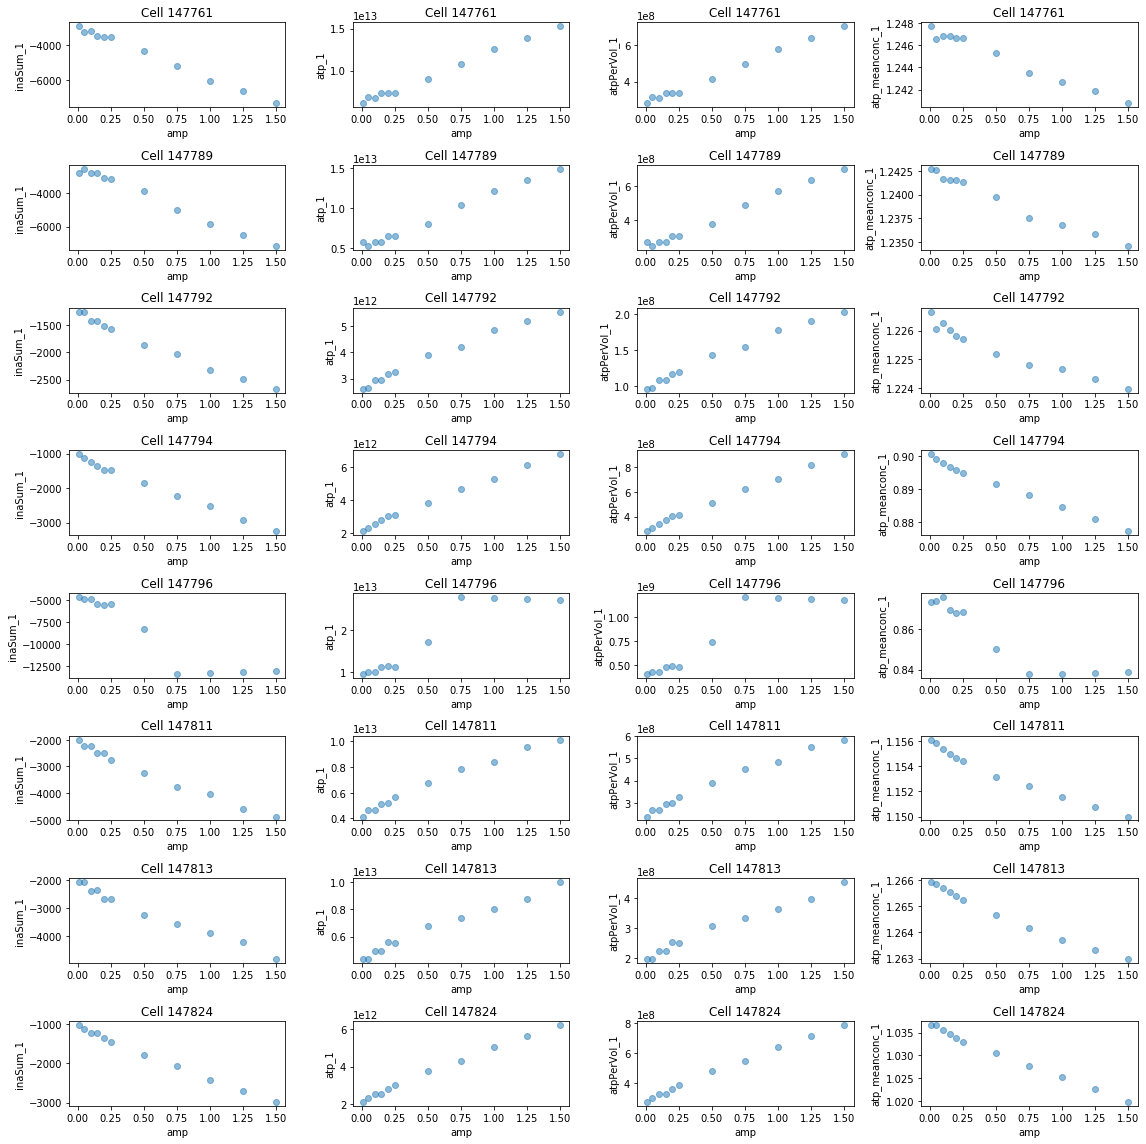

In [6]:
fig, axs = plt.subplots(8,4,figsize=(16,16))

for i,c in enumerate(['inaSum_1','atp_1','atpPerVol_1','atp_meanconc_1']):
        
    x = i % 4
     
    for j,gids in enumerate(atpFromIna.loc[atpFromIna['etype']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(atpFromIna.loc[atpFromIna['gid']==gids,'amp'],atpFromIna.loc[atpFromIna['gid']==gids,c], marker='.', linestyle='', ms=12,  alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

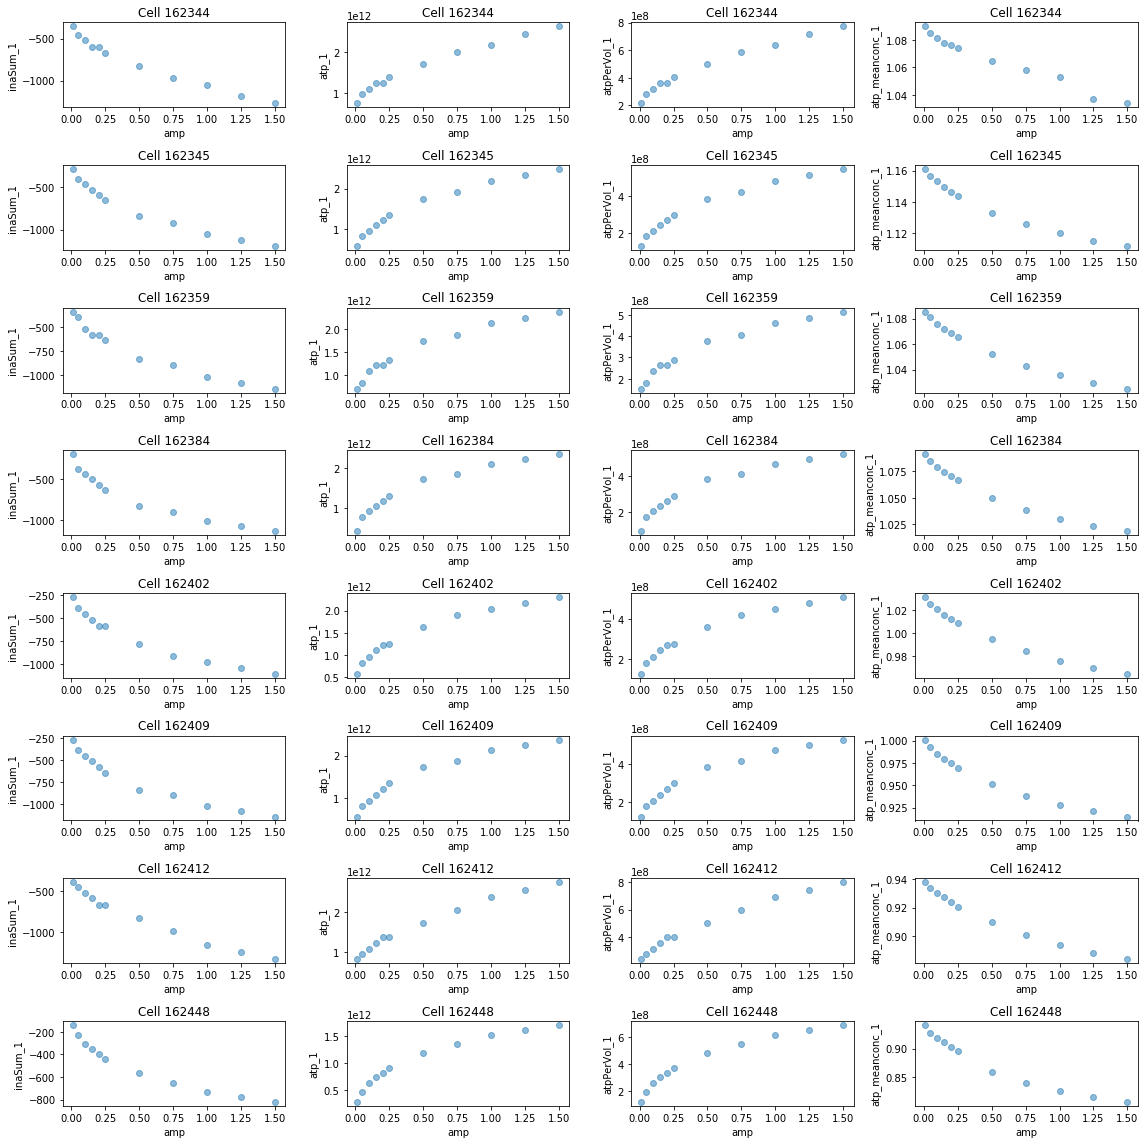

In [7]:
fig, axs = plt.subplots(8,4,figsize=(16,16))

for i,c in enumerate(['inaSum_1','atp_1','atpPerVol_1','atp_meanconc_1']):
        
    x = i % 4
     
    for j,gids in enumerate(atpFromIna.loc[atpFromIna['etype']=='bAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(atpFromIna.loc[atpFromIna['gid']==gids,'amp'],atpFromIna.loc[atpFromIna['gid']==gids,c], marker='.', linestyle='', ms=12, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

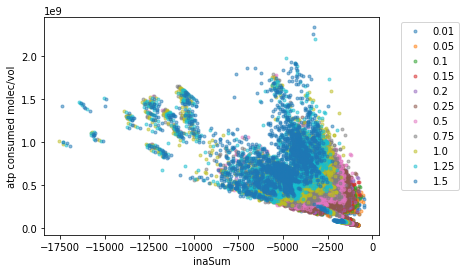

In [8]:
groups = atpFromIna.loc[atpFromIna['etype']=='cADpyr',:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['inaSum_1'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('inaSum')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


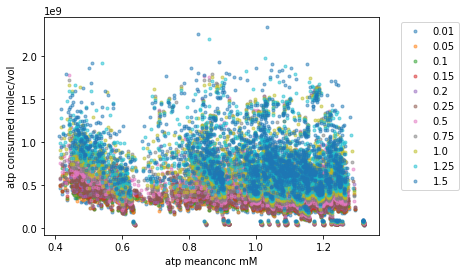

In [9]:
groups = atpFromIna.loc[atpFromIna['etype']=='cADpyr',:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['atp_meanconc_1'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('atp meanconc mM')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


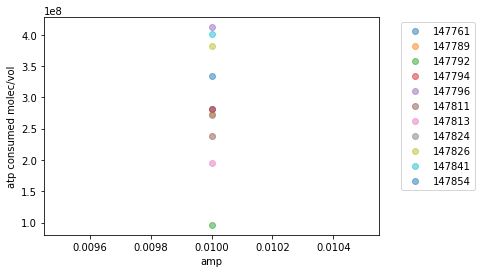

In [10]:
groups = atpFromIna.loc[0:10,:].loc[atpFromIna['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atpPerVol_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


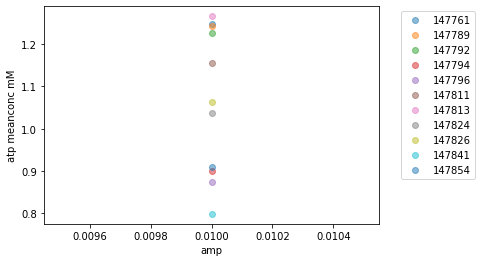

In [11]:
groups = atpFromIna.loc[0:10,:].loc[atpFromIna['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


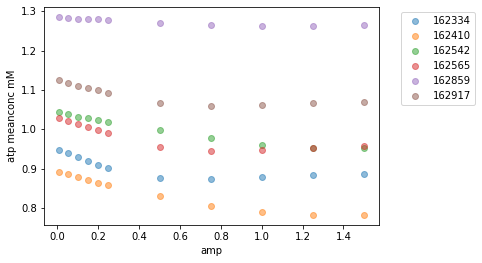

In [12]:
groups = atpFromIna.loc[atpFromIna['etype']=='cSTUT',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


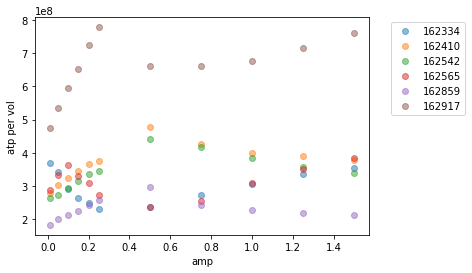

In [13]:
groups = atpFromIna.loc[atpFromIna['etype']=='cSTUT',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atpPerVol_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp per vol') 

plt.show()


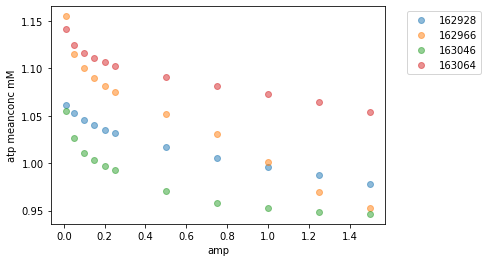

In [14]:
groups = atpFromIna.loc[atpFromIna['etype']=='cNAC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


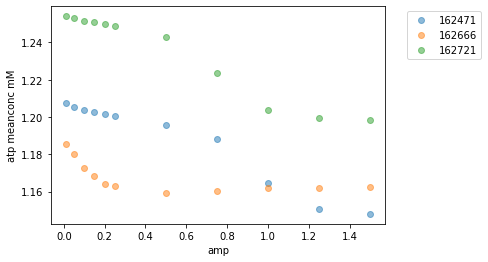

In [15]:
groups = atpFromIna.loc[atpFromIna['etype']=='dNAC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


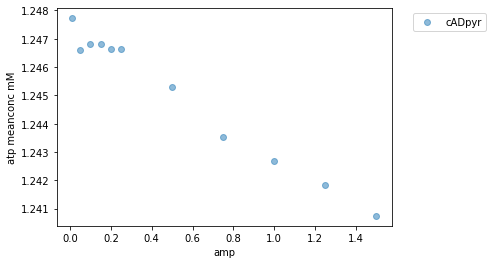

In [16]:
groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_meanconc_1'].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('atp meanconc mM') 

plt.show()


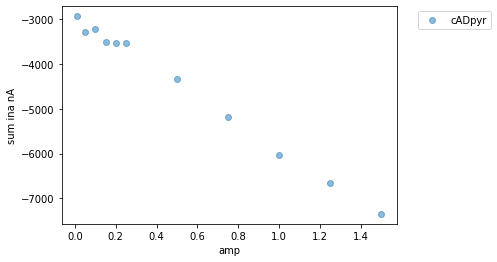

In [17]:
groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['inaSum_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('sum ina nA') 

plt.show()


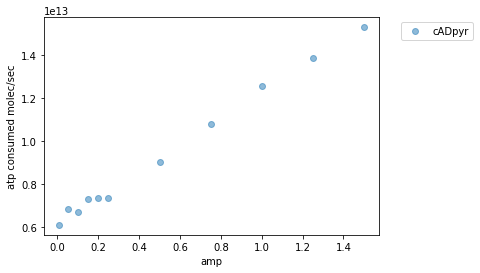

In [18]:
# atp consumed. based on ina

groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('atp consumed molec/sec') 

plt.show()


In [19]:
# atp consumed. based on ina

groups = atpFromIna.loc[atpFromIna['gid']==147761,:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atpPerVol_1'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')


ax.set_xlabel('amp')
ax.set_ylabel('atp consumed molec/sec/volume um3') 

plt.show()


In [20]:
efeldf = pd.DataFrame()

for i in range(11):
    feature_values_file_name1 = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/linamp" + str(i+1) + "/efel_amp_f1.pickle"
    feature_values_file_name2 = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/linamp" + str(i+1) + "/efel_amp_f2.pickle"
    
    
    with open(feature_values_file_name1, 'rb') as handle:
        feature_values = pickle.load(handle)

    with open(feature_values_file_name2, 'rb') as handle:
        feature_values2 = pickle.load(handle)

    fr1 = pd.DataFrame(feature_values)
    fr2 = pd.DataFrame(feature_values2)

    fr = pd.concat([fr1,fr2])
    frt = fr.transpose()
    frt = frt.reset_index()
    frt = frt.rename(columns = {'index':'gid'})

    frt['gid']=frt['gid'].astype(int)
    frt = frt.dropna()

    if (i+1 == 1):
        frt['amp'] = 0.01
    elif (i+1 == 2):
        frt['amp'] = 0.05
    elif (i+1 == 3):
        frt['amp'] = 0.1
    elif (i+1 == 4):
        frt['amp'] = 0.15
    elif (i+1 == 5):
        frt['amp'] = 0.2
    elif (i+1 == 6):
        frt['amp'] = 0.25
    elif (i+1 == 7):
        frt['amp'] = 0.5
    elif (i+1 == 8):
        frt['amp'] = 0.75
    elif (i+1 == 9):
        frt['amp'] = 1.0
    elif (i+1 == 10):
        frt['amp'] = 1.25
    elif (i+1 == 11):
        frt['amp'] = 1.5
    else:
        print("check i")
        
    efeldf = efeldf.append(frt,ignore_index=True)
    
efeldf = efeldf.reset_index(drop=True)

In [21]:
efeldf.head()

gid  AP_height  AP_duration  mean_frequency  AHP_depth  \
0  147761  27.544033     2.430769       13.058764   2.185795   
1  147792  30.542889     3.292857       15.057002  -7.885944   
2  147794  45.680007     3.258824       17.533003 -12.176657   
3  147796  21.503299     2.775000       12.609015   3.396357   
4  147811  43.726481     3.220000       16.054800  -9.873776   

   AHP_time_from_peak  voltage_base  time_to_first_spike  time_to_last_spike  \
0           13.300000    -65.119095                 22.1               995.5   
1           14.950000    -65.089149                 23.2               929.8   
2           12.335294    -65.099838                 20.5               969.6   
3           14.925000    -65.104012                 22.3               951.7   
4           11.600000    -65.095306                 23.1               934.3   

     ISI_CV  ...  AHP_depth_abs  Spikecount  amp_drop_first_last  \
0  0.916893  ...     -62.933300        13.0             6.740355   
1  0.292793  ...     -72.975093        14.0             3.752031   
2  0.132300  ...     -77.276496        17.0             2.532948   
3  0.983818  ...     -61.707654        12.0            12.167288   
4  0.082850  ...     -74.969083        15.0             1.888195   

   irregularity_index  max_amp_difference  maximum_voltage  peak_voltage  \
0           57.409091           52.410055        37.643990     27.544033   
1           19.866667            2.932974        33.568310     30.542889   
2            5.673333            1.471687        47.551270     45.680007   
3           28.550000           40.880567        34.368328     21.503299   
4            5.638462            0.904297        44.891506     43.726481   

   spike_half_width  mean_AP_amplitude   amp  
0          6.024951          65.835158  0.01  
1          1.532190          70.410073  0.01  
2          0.917502          89.891568  0.01  
3         17.509610          59.934545  0.01  
4          1.008217          85.611063  0.01  

[5 rows x 29 columns]

In [22]:
df = pd.merge(atpFromIna,efeldf,on=['gid','amp'],how='inner')

In [23]:
len(efeldf)

21737

In [24]:
len(atpFromIna)

23441

In [25]:
len(df)

21730

In [26]:
df.columns

Index(['gid', 'cells_volumes_um3', 'cells_areas', 'atp_1', 'inaSum_1', 'atp_2',
       'inaSum_2', 'x', 'y', 'z', 'synapse_class', 'layer', 'etype', 'mtype',
       'etype_mtype', 'atp_meanconc_1', 'atp_meanconc_2', 'amp', 'atpPerVol_1',
       'atpPerVol_2', 'AP_height', 'AP_duration', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI',
       'inv_fifth_ISI', 'inv_last_ISI', 'AP_amplitude',
       'AP_duration_half_width', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'peak_voltage', 'spike_half_width',
       'mean_AP_amplitude'],
      dtype='object')

In [27]:
atp_rate = pd.DataFrame()

for i in range(11):
    atp_ratefile = "/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/linamp" + str(i+1) + "/atpRate.tsv" # in case of ina_500
    
    atp_rateSub = pd.read_csv(atp_ratefile,sep='\t',index_col=0)
    
    if (i+1 == 1):
        atp_rateSub['amp'] = 0.01
    elif (i+1 == 2):
        atp_rateSub['amp'] = 0.05
    elif (i+1 == 3):
        atp_rateSub['amp'] = 0.1
    elif (i+1 == 4):
        atp_rateSub['amp'] = 0.15
    elif (i+1 == 5):
        atp_rateSub['amp'] = 0.2
    elif (i+1 == 6):
        atp_rateSub['amp'] = 0.25
    elif (i+1 == 7):
        atp_rateSub['amp'] = 0.5
    elif (i+1 == 8):
        atp_rateSub['amp'] = 0.75
    elif (i+1 == 9):
        atp_rateSub['amp'] = 1.0
    elif (i+1 == 10):
        atp_rateSub['amp'] = 1.25
    elif (i+1 == 11):
        atp_rateSub['amp'] = 1.5
    else:
        print("check i")
        
    atp_rate = atp_rate.append(atp_rateSub,ignore_index=True)
    
atp_rate = atp_rate.reset_index(drop=True)

In [28]:
atp_rate = atp_rate.drop(columns=['x', 'y', 'z', 'synapse_class', 'layer', 'etype', 'mtype', 'etype_mtype'])


In [29]:
atp_rate.columns

Index(['gid', 'atp_rate', 'amp'], dtype='object')

In [30]:
df_rate = pd.merge(df,atp_rate,on=['gid','amp'],how='inner')

In [31]:
df = df_rate.copy()

In [32]:
df.columns

Index(['gid', 'cells_volumes_um3', 'cells_areas', 'atp_1', 'inaSum_1', 'atp_2',
       'inaSum_2', 'x', 'y', 'z', 'synapse_class', 'layer', 'etype', 'mtype',
       'etype_mtype', 'atp_meanconc_1', 'atp_meanconc_2', 'amp', 'atpPerVol_1',
       'atpPerVol_2', 'AP_height', 'AP_duration', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI',
       'inv_fifth_ISI', 'inv_last_ISI', 'AP_amplitude',
       'AP_duration_half_width', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'peak_voltage', 'spike_half_width',
       'mean_AP_amplitude', 'atp_rate'],
      dtype='object')

In [33]:
df.loc[df['etype']=='cADpyr','mtype'].unique()

array(['L5_TPC:A'], dtype=object)

In [34]:
groups = df.loc[df['etype']=='cADpyr',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['mean_frequency'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('mean frequency Hz') 

plt.show()


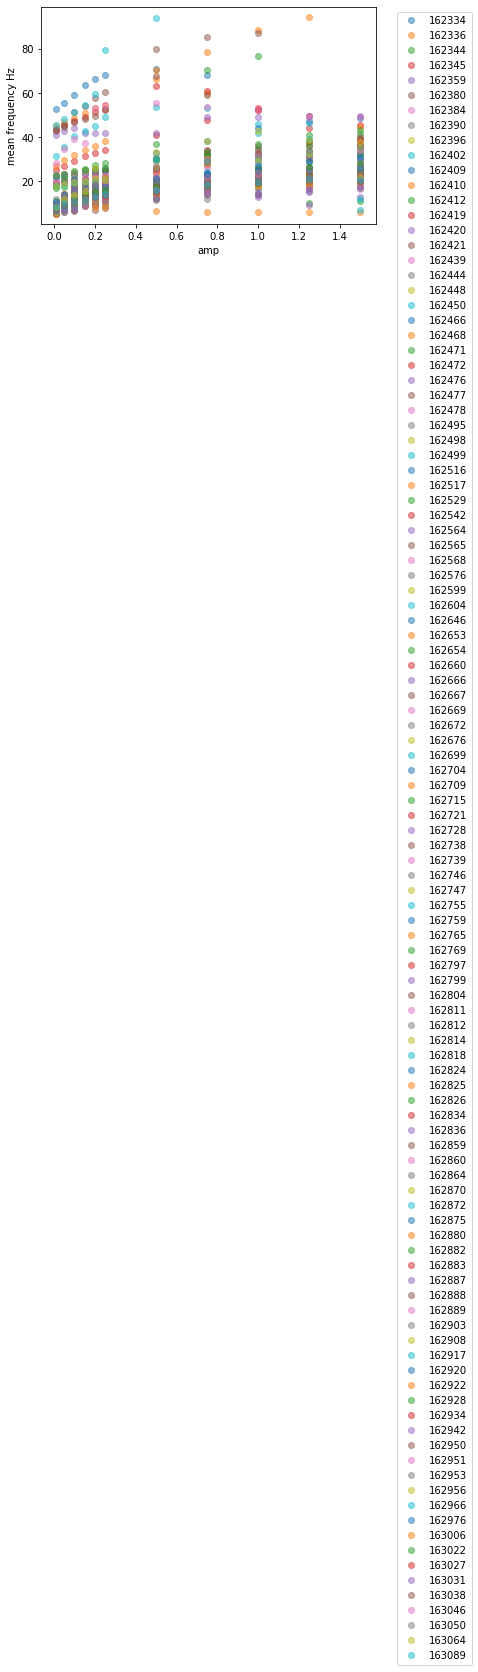

In [35]:
groups = df.loc[df['mtype']=='L5_MC',:].groupby('gid')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['mean_frequency'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('mean frequency Hz') 

plt.show()


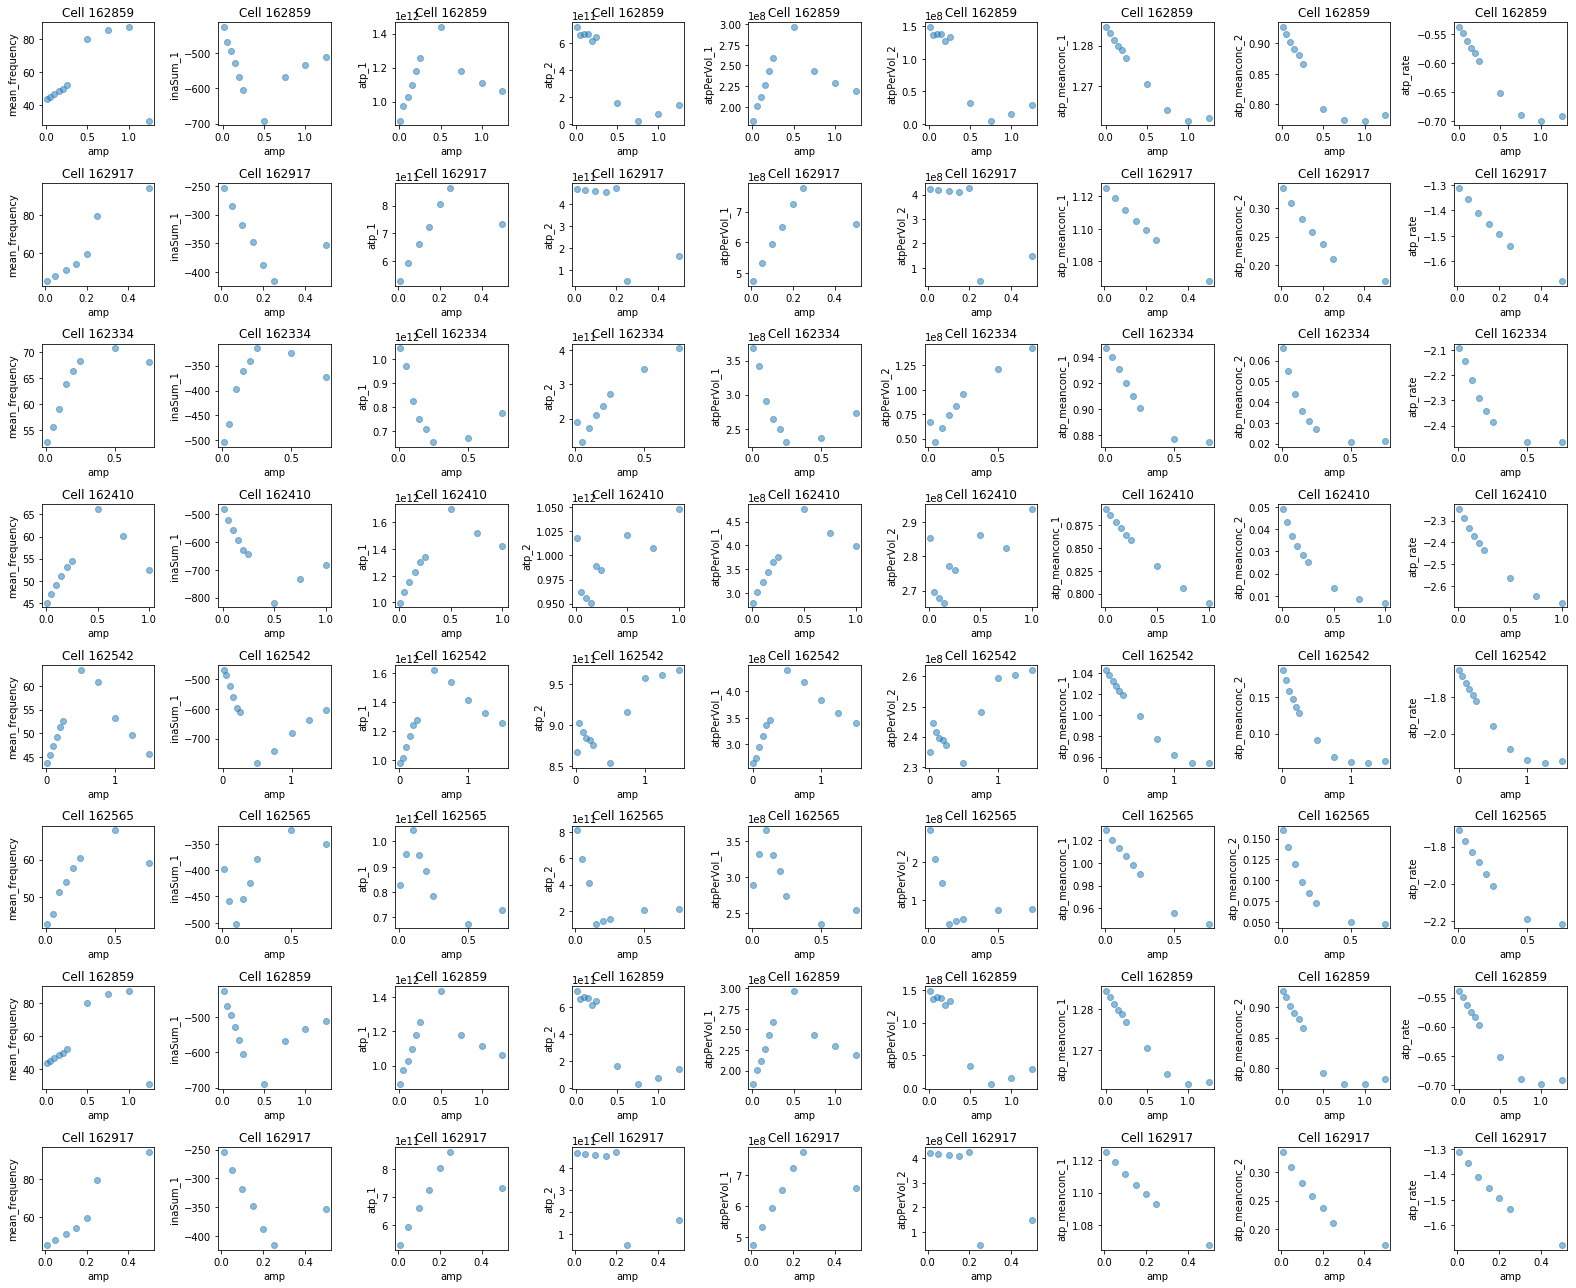

In [36]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cSTUT','gid'][4:12]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

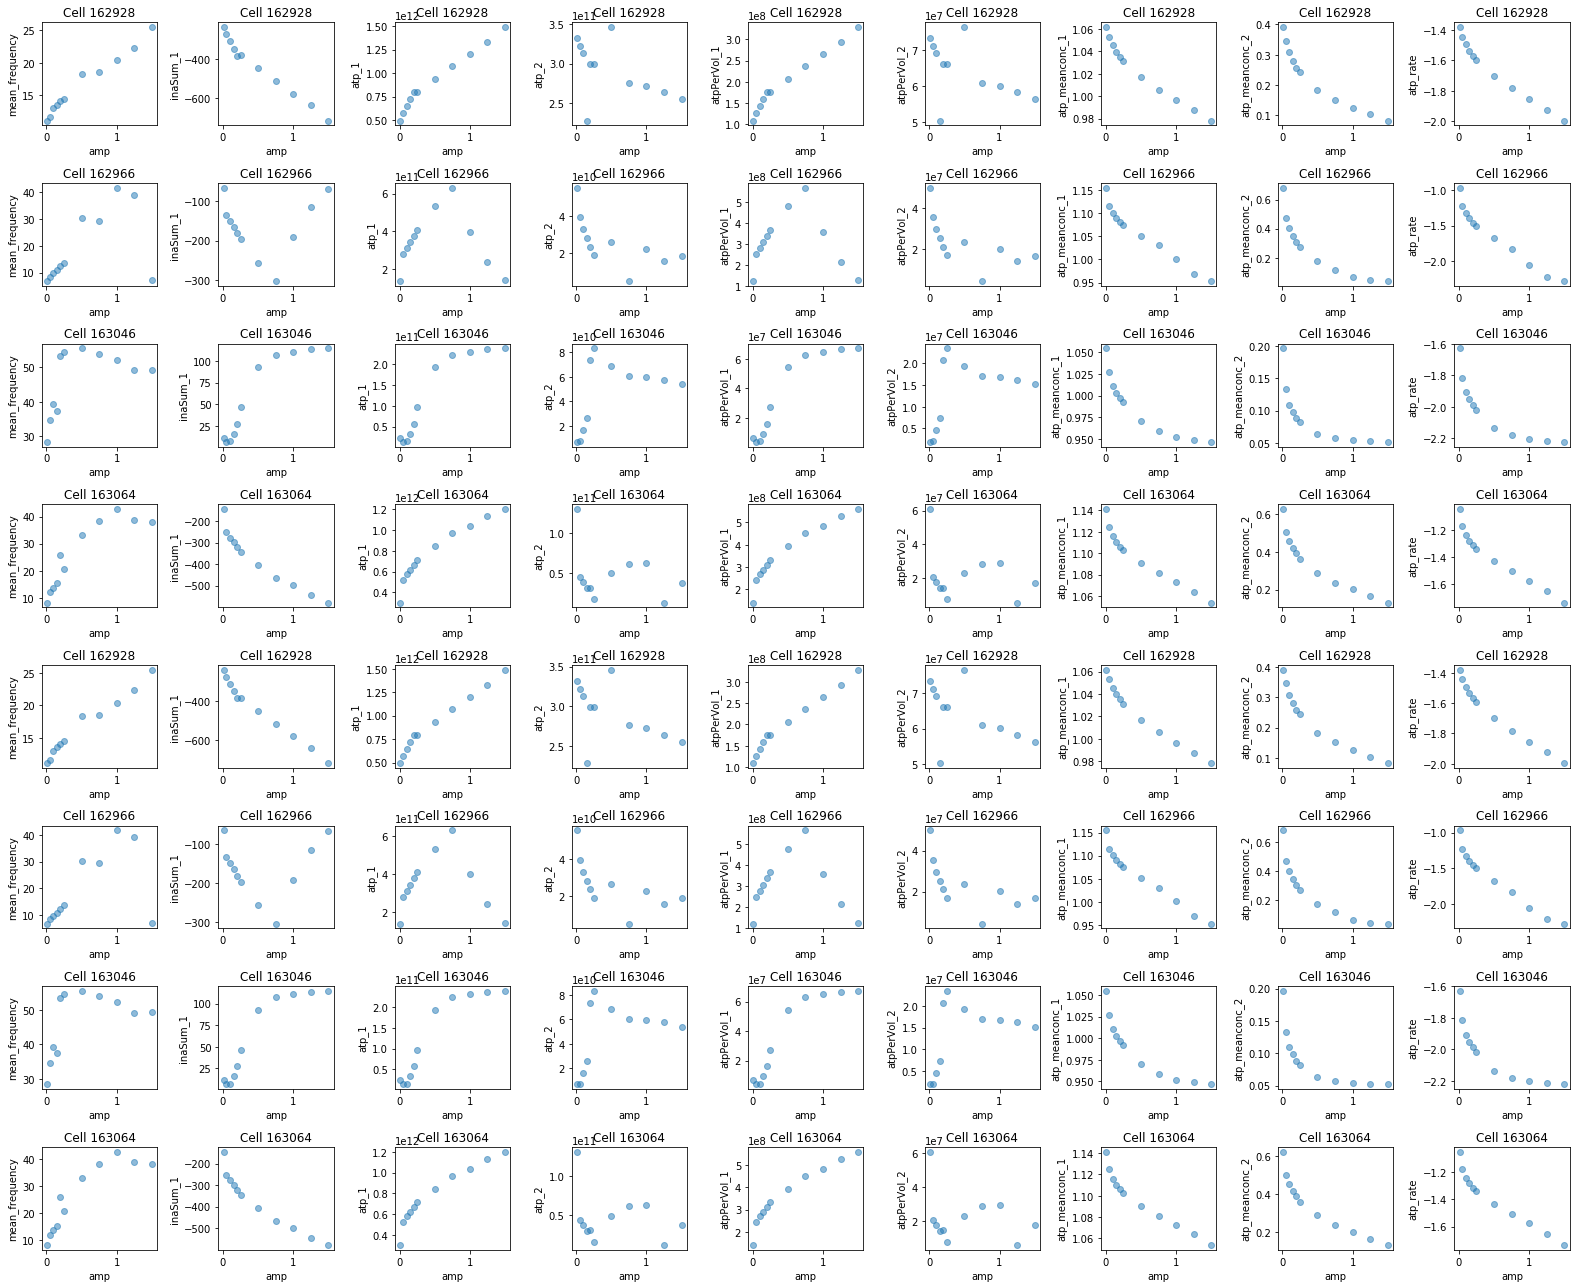

In [37]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cNAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

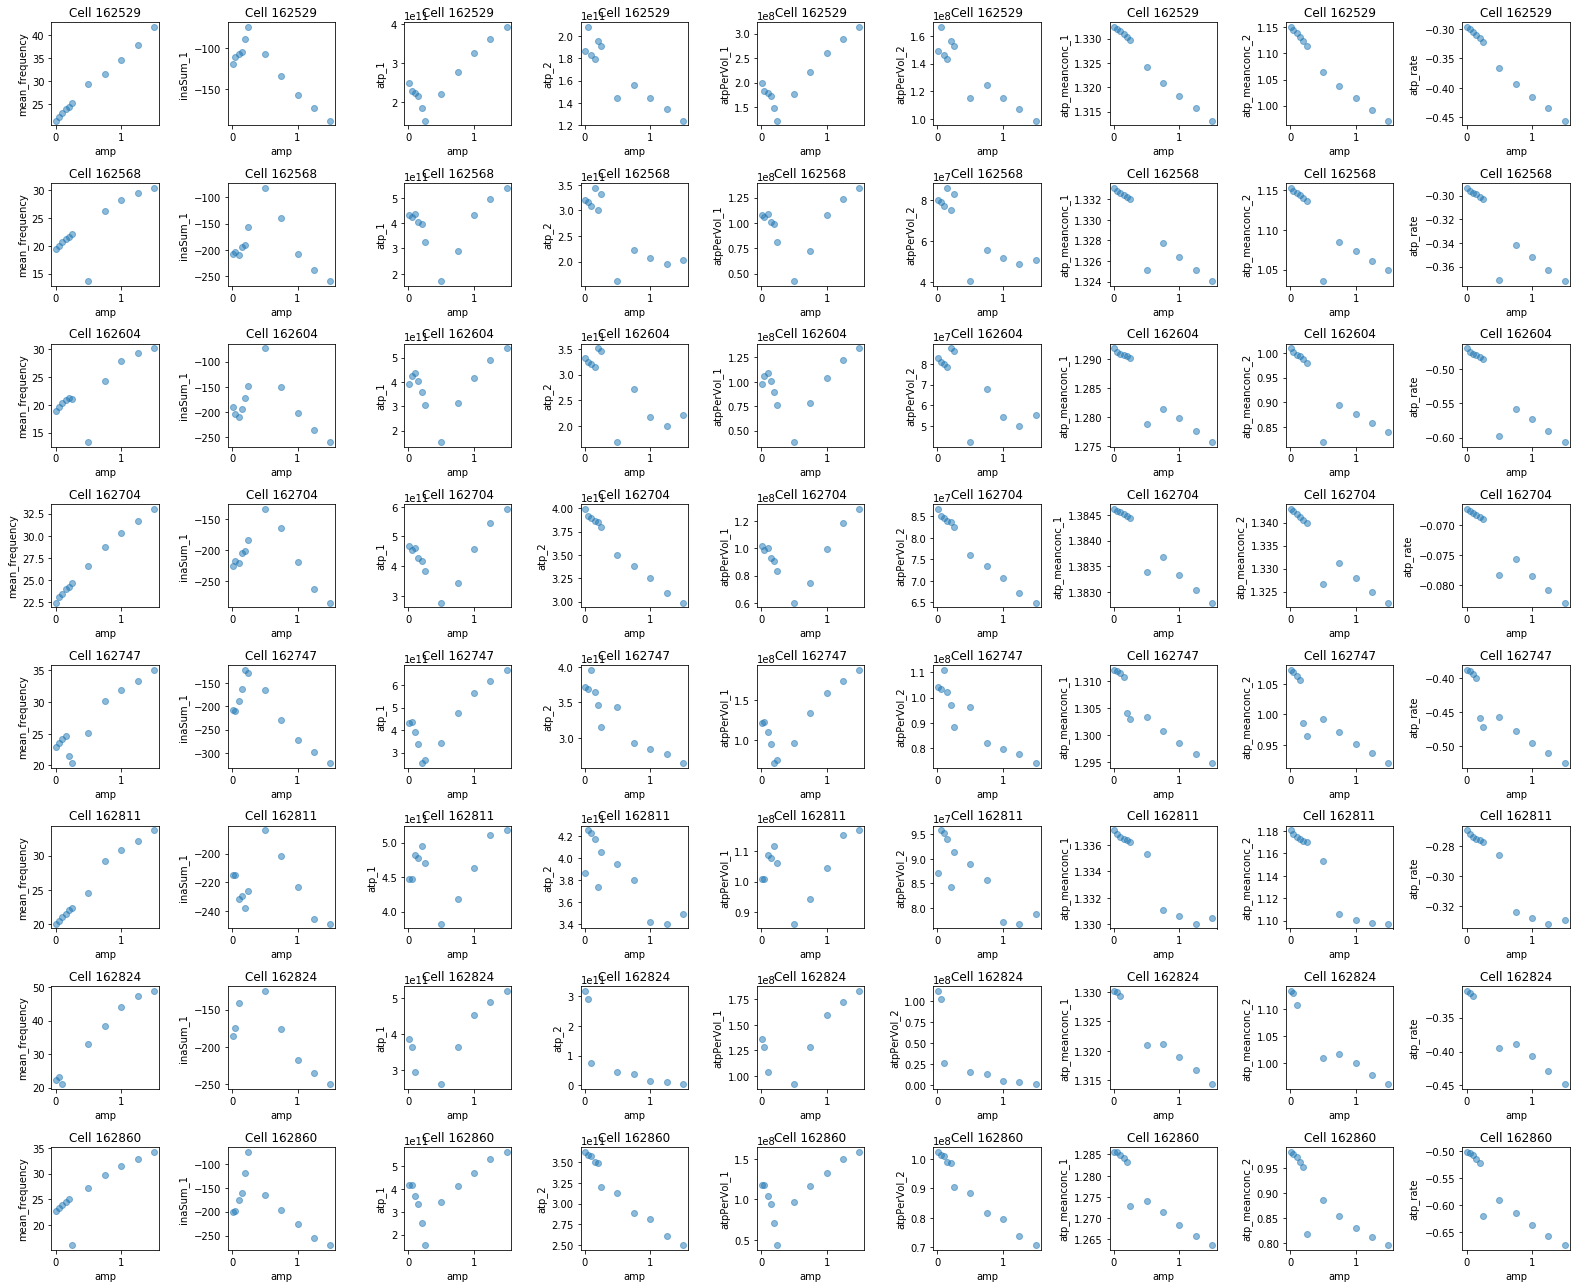

In [38]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='bIR','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

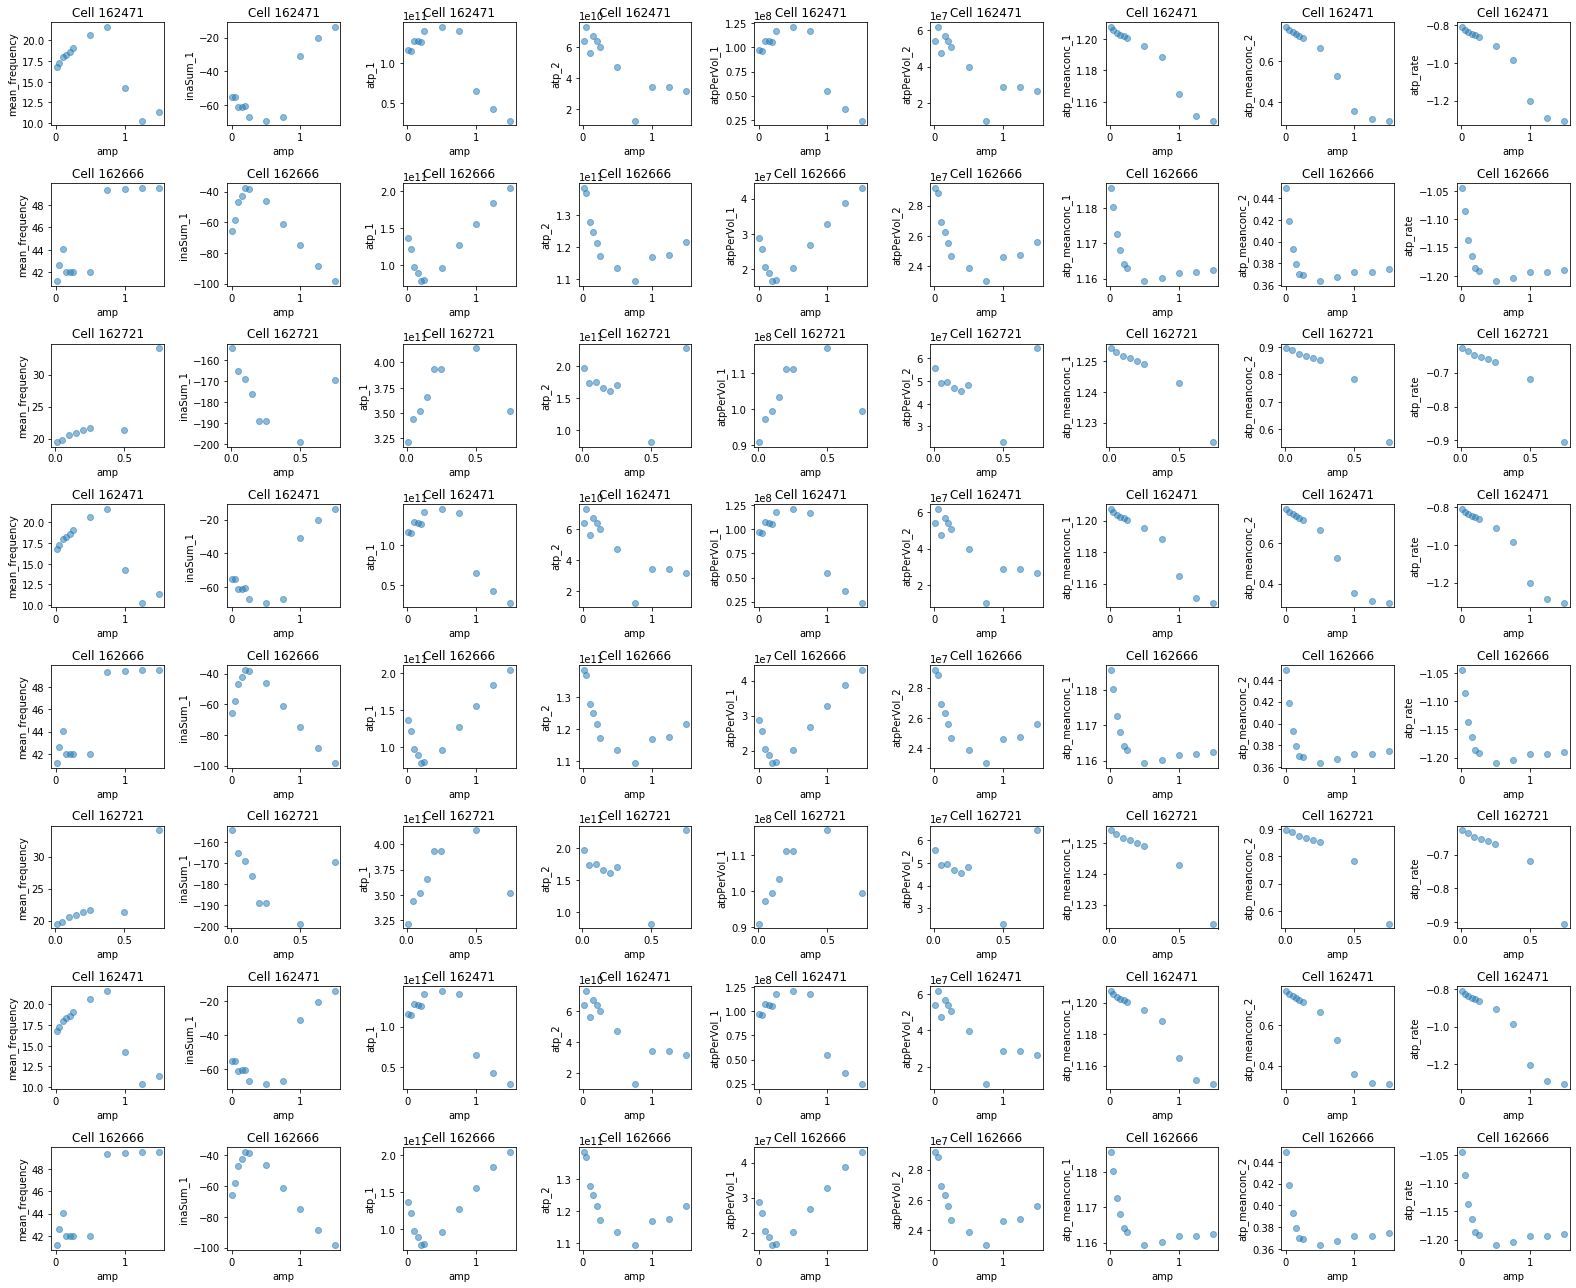

In [39]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='dNAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

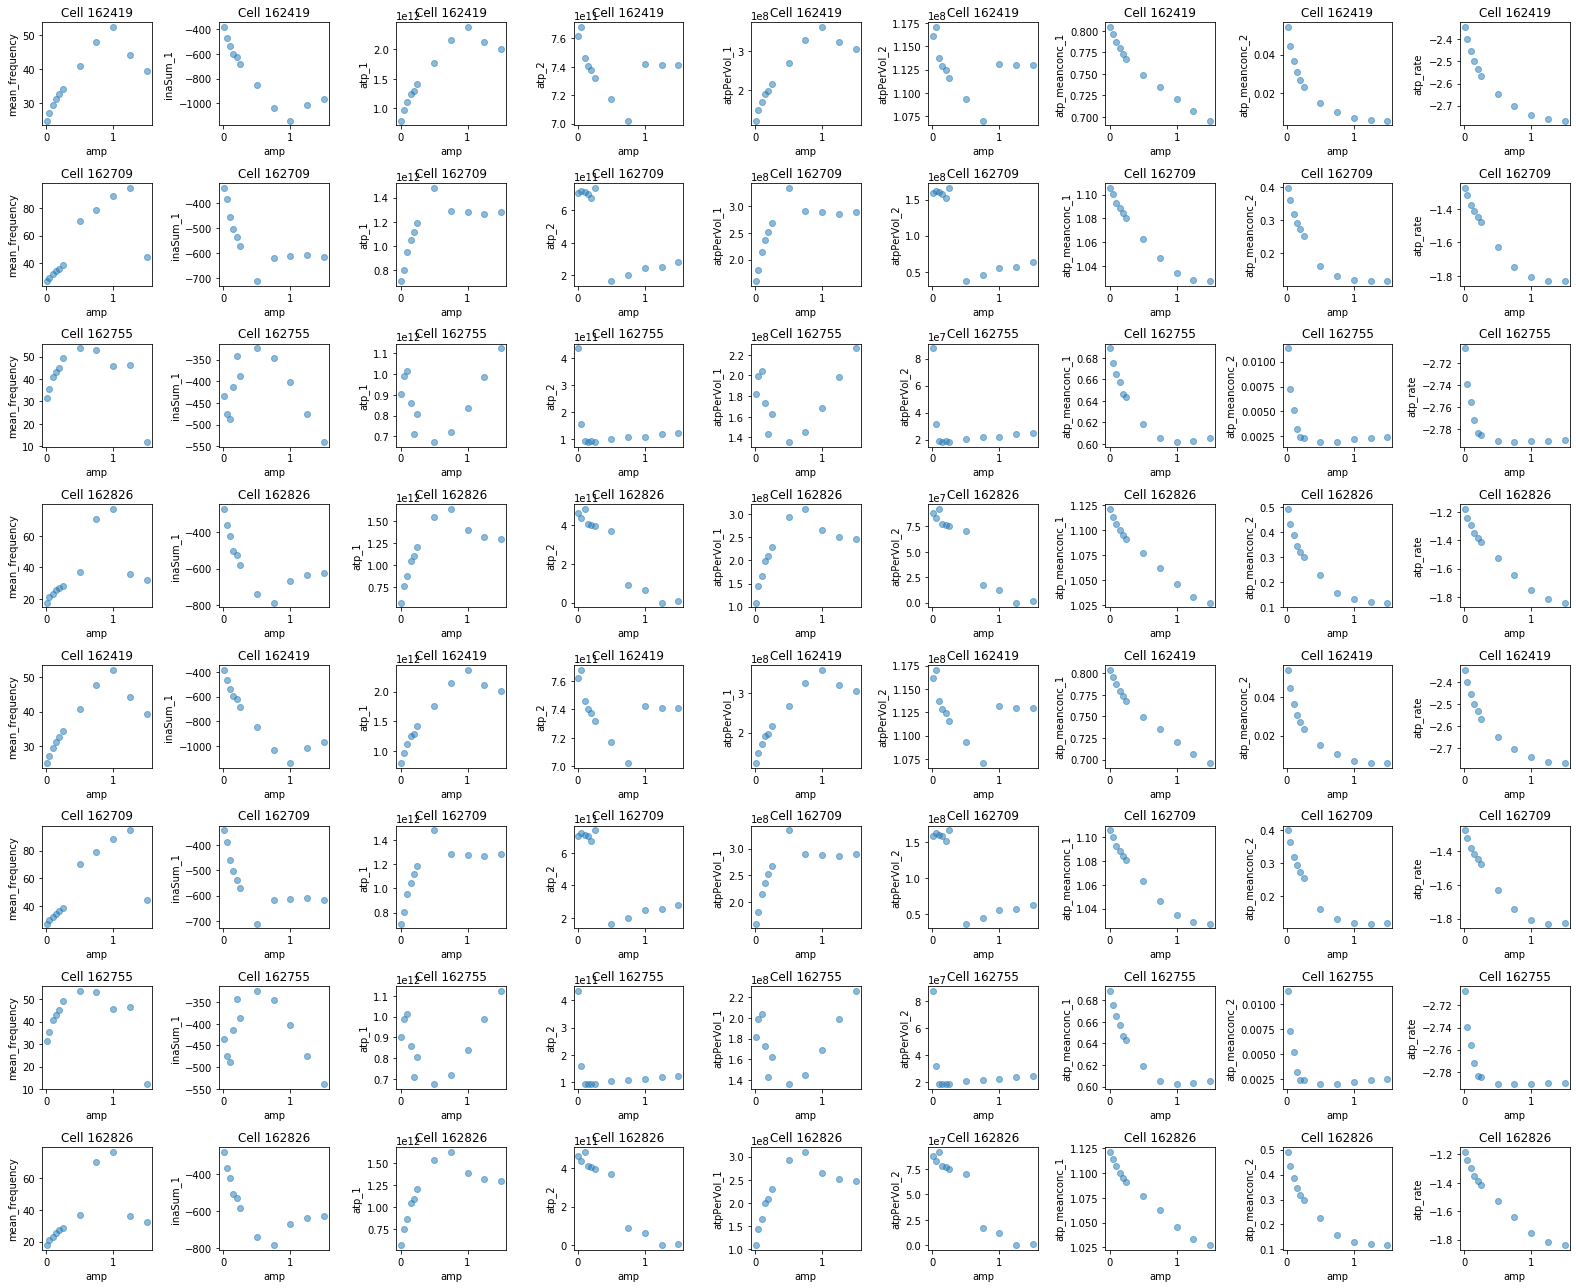

In [40]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='bSTUT','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

In [41]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='bAC','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

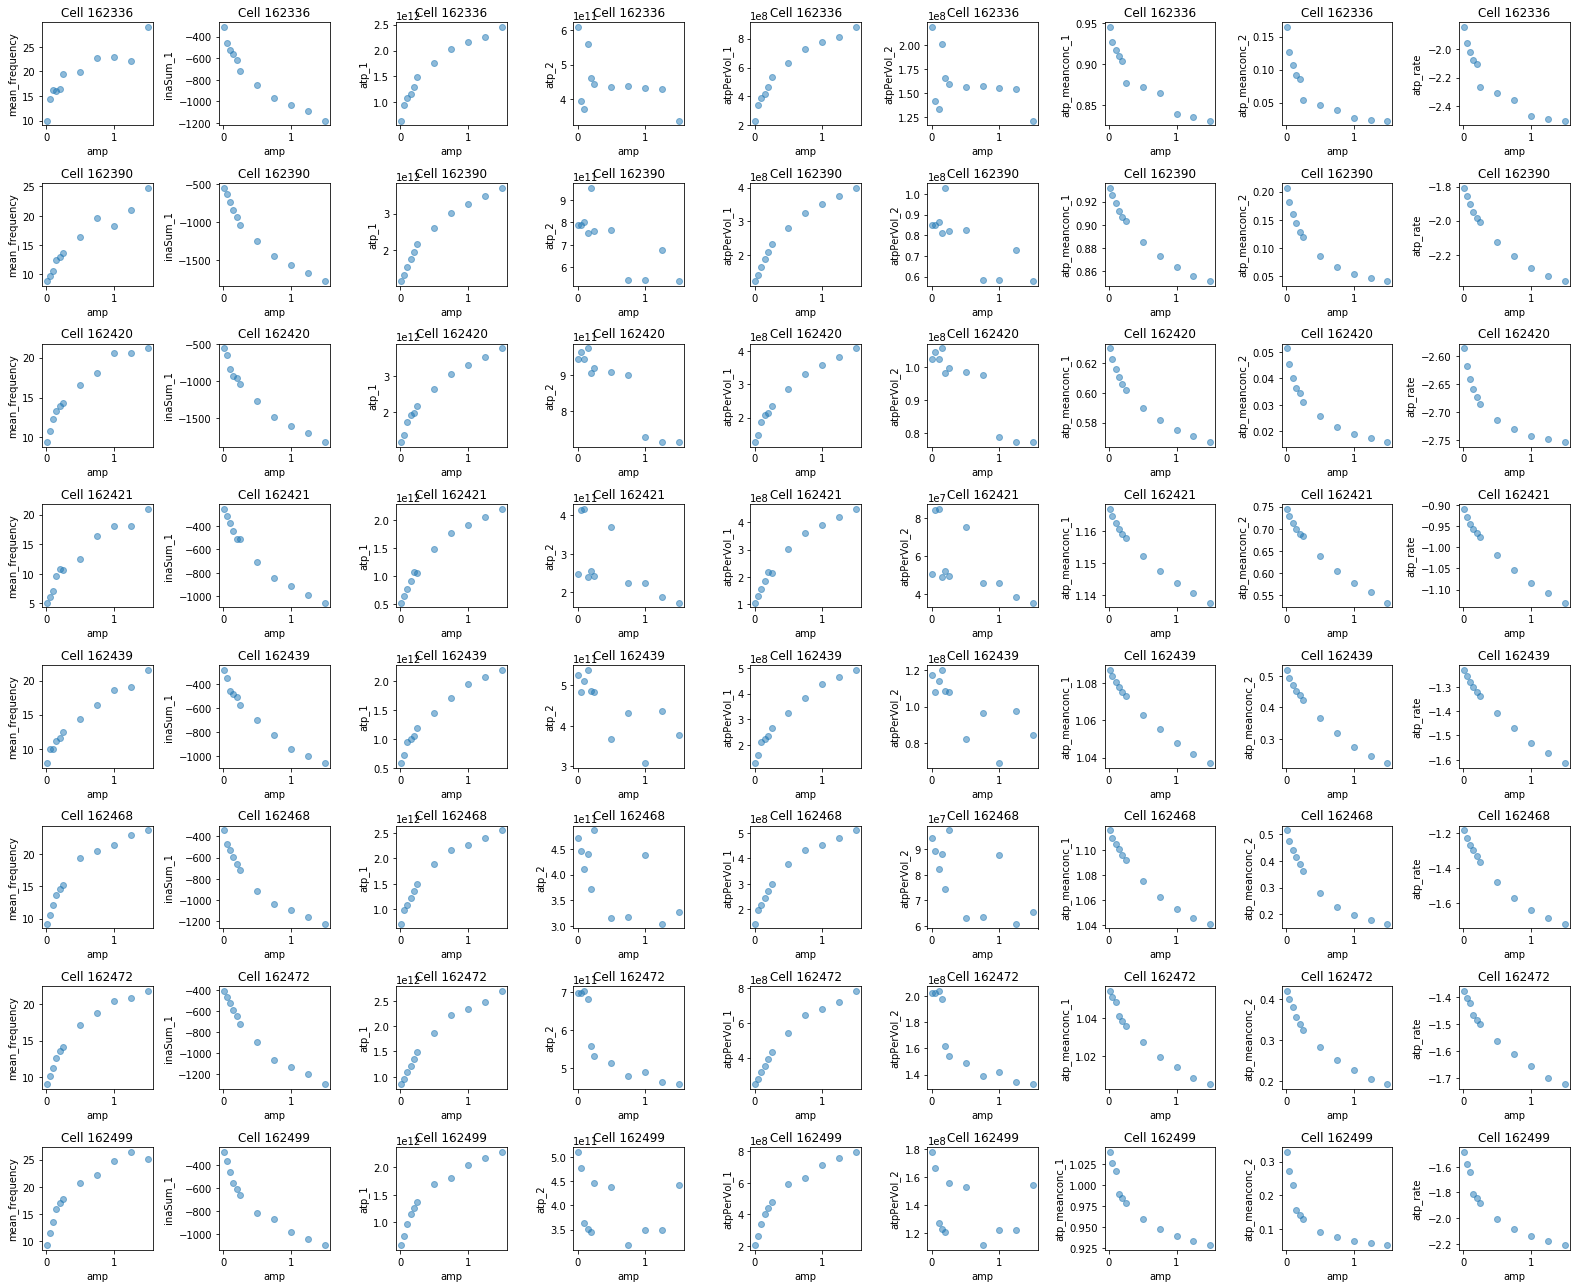

In [42]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cACint','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

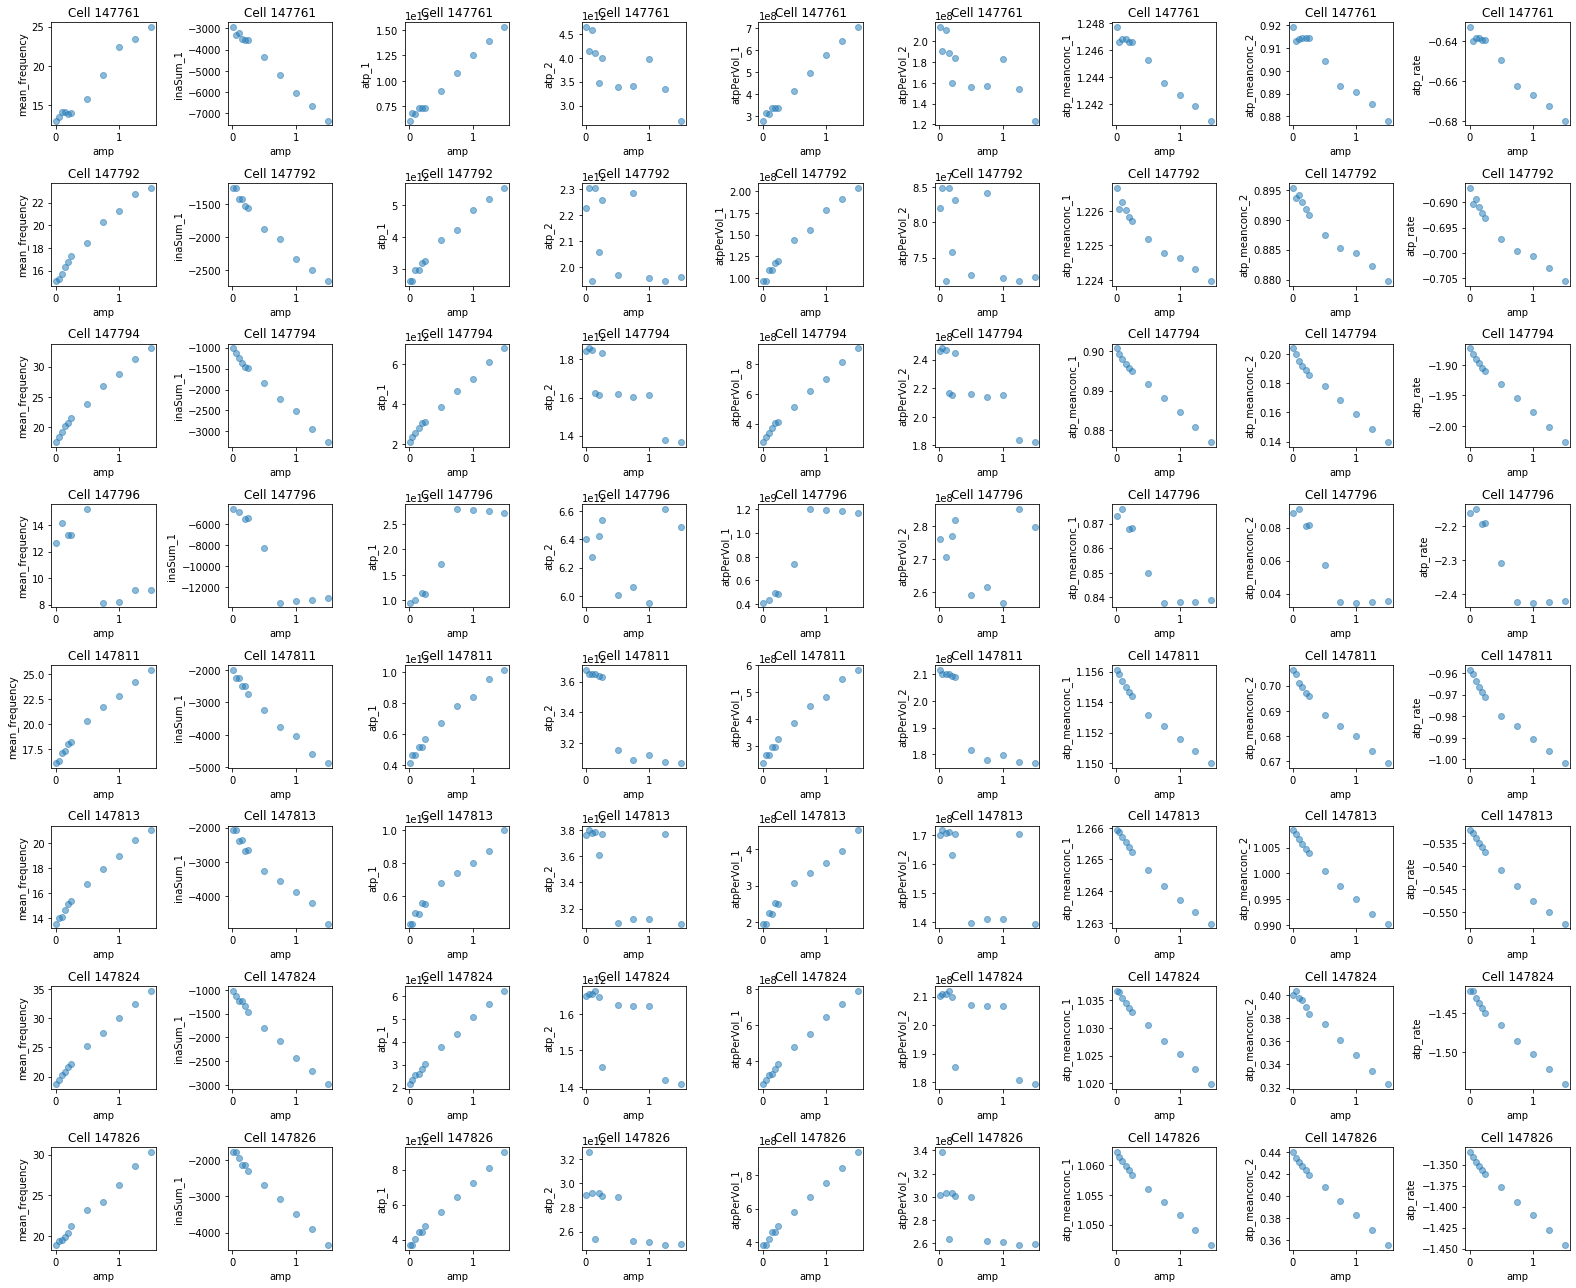

In [43]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=c)

fig.tight_layout()

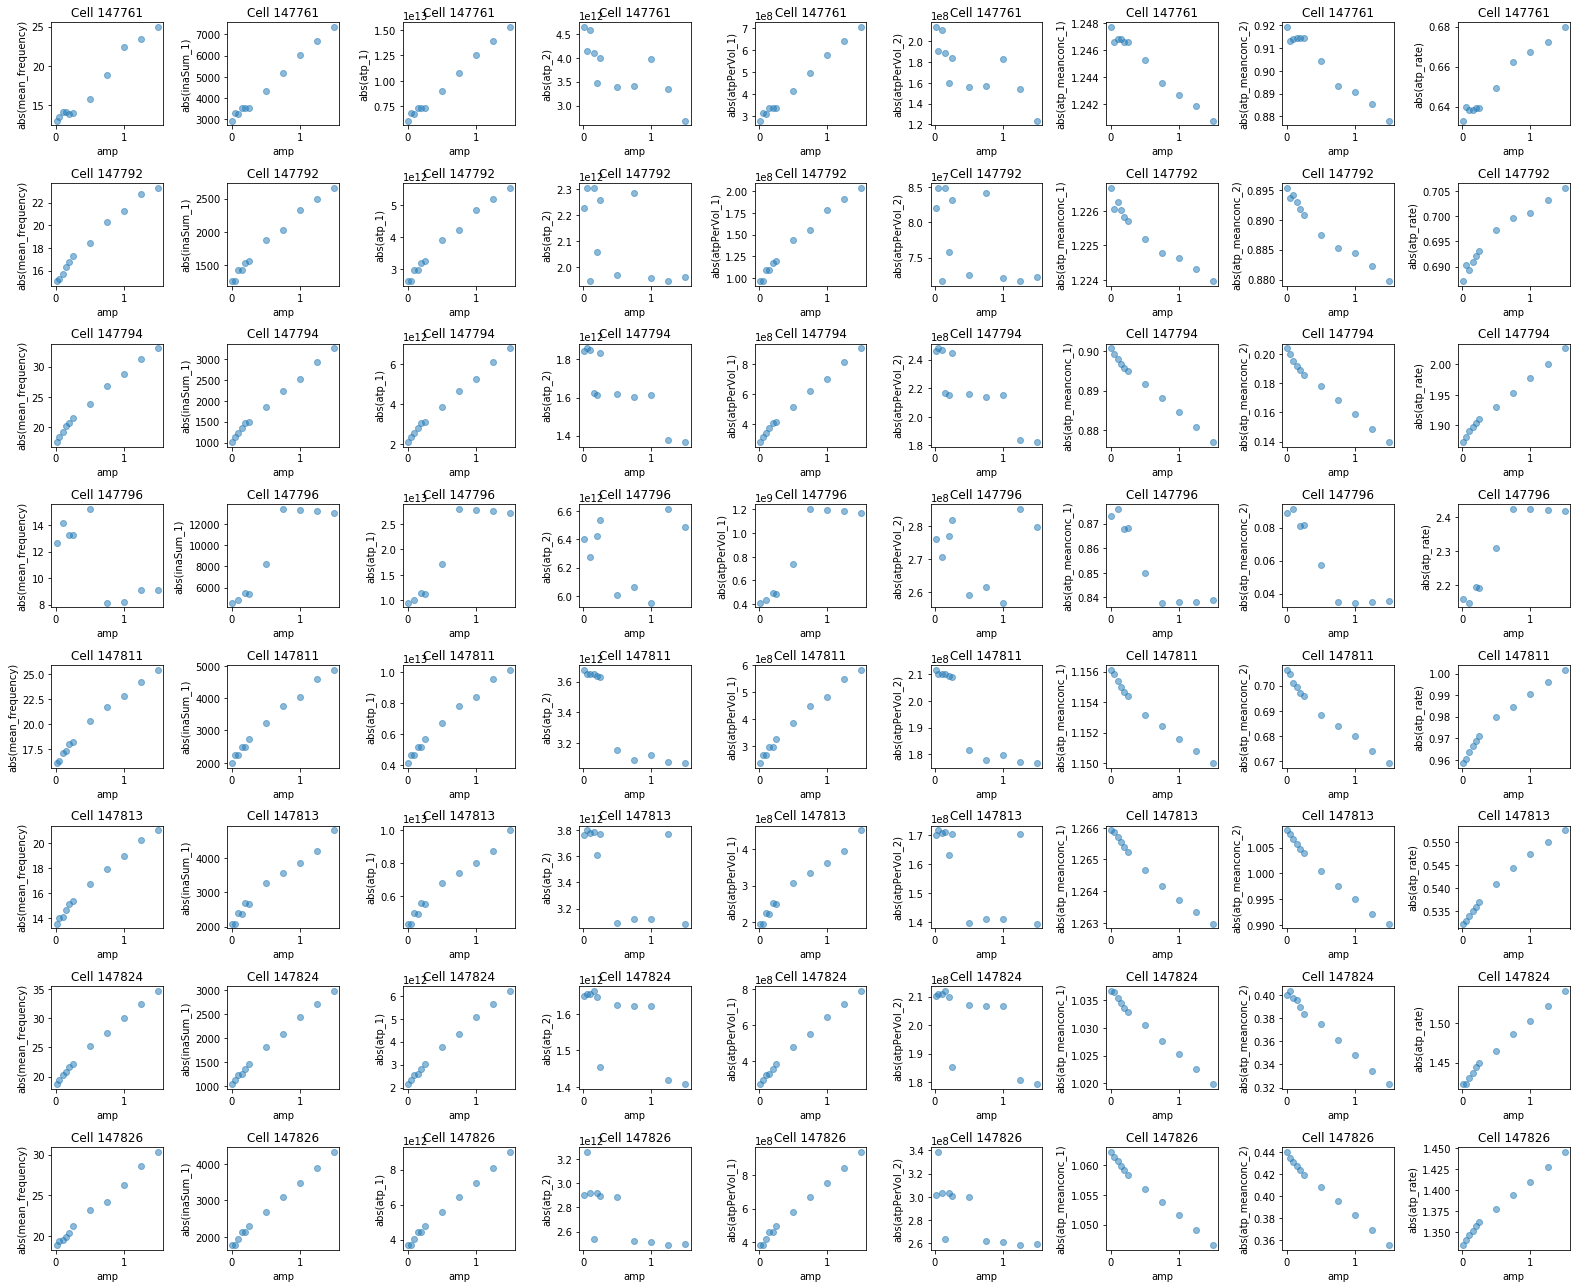

In [44]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['mean_frequency','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'amp'],df.loc[df['gid']==gids,c].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='amp', ylabel=f'abs({c})')

fig.tight_layout()

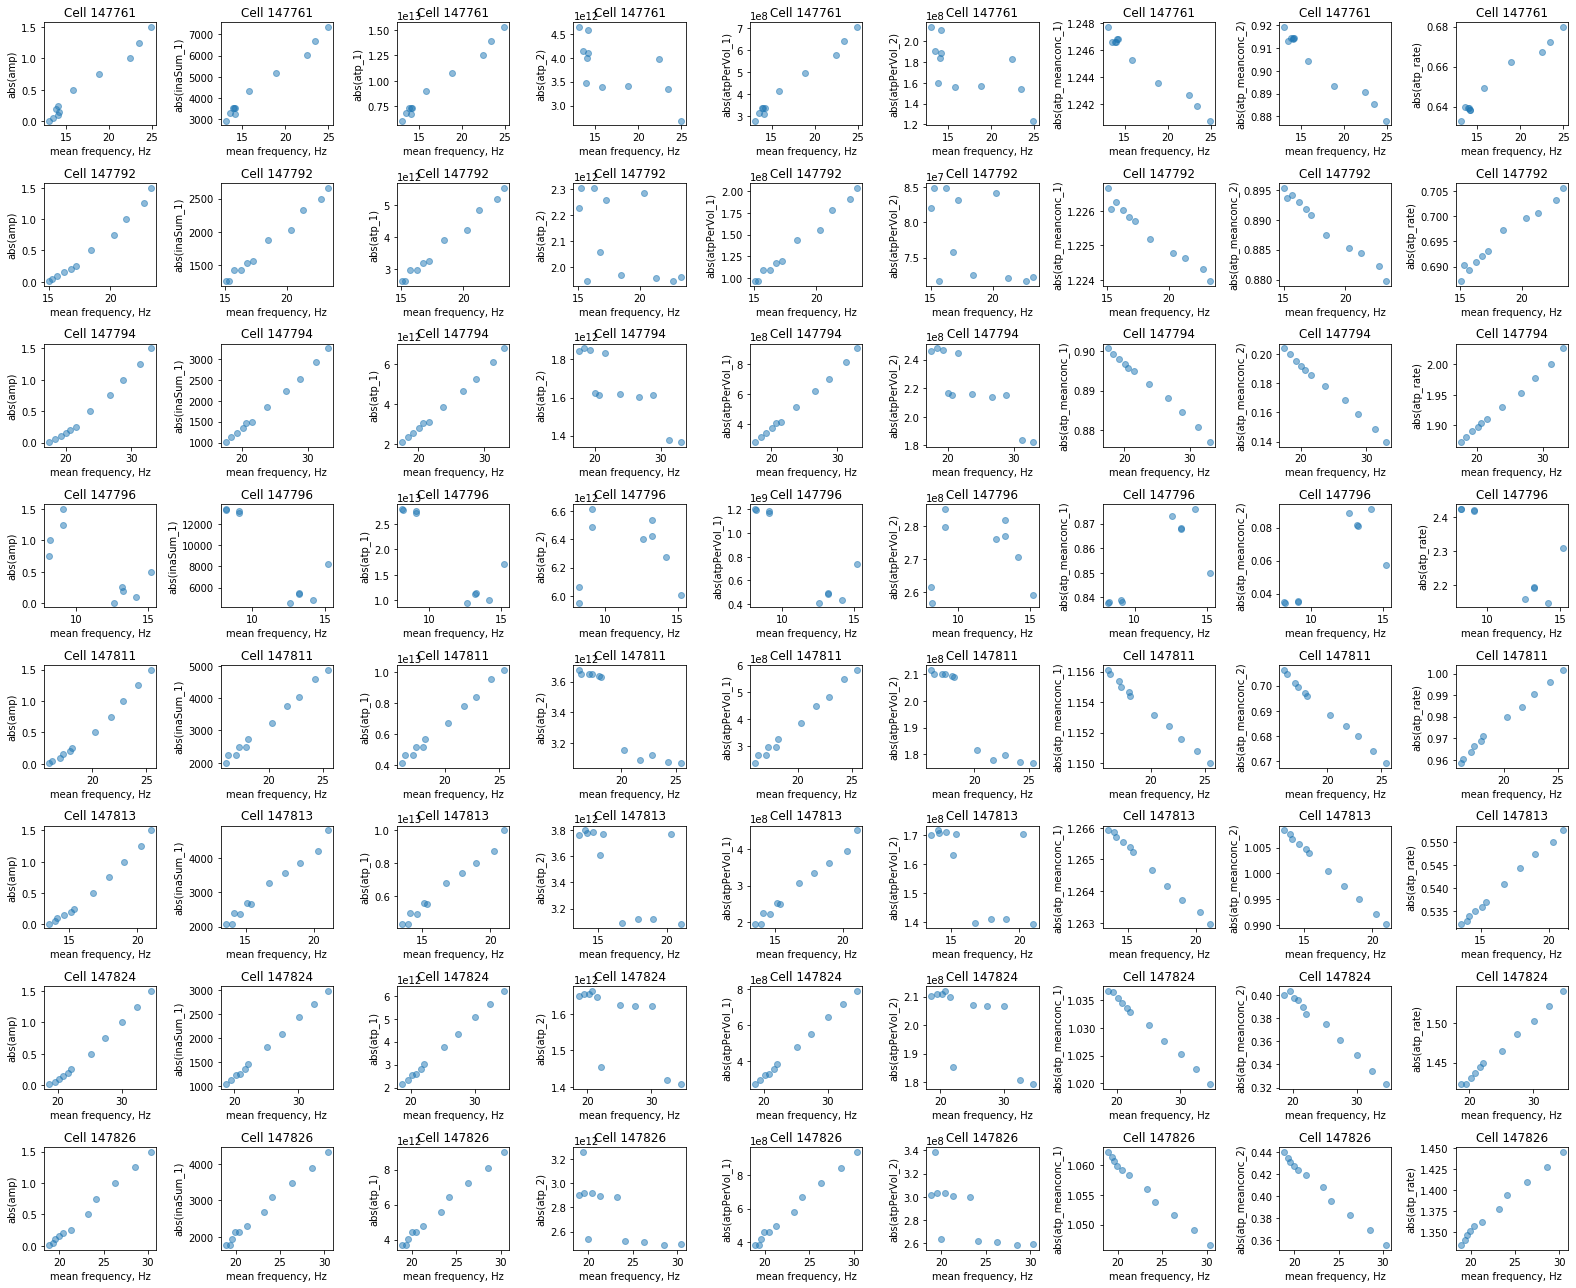

In [45]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['amp','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'mean_frequency'],df.loc[df['gid']==gids,c].abs(), marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='mean frequency, Hz', ylabel=f'abs({c})')

fig.tight_layout()

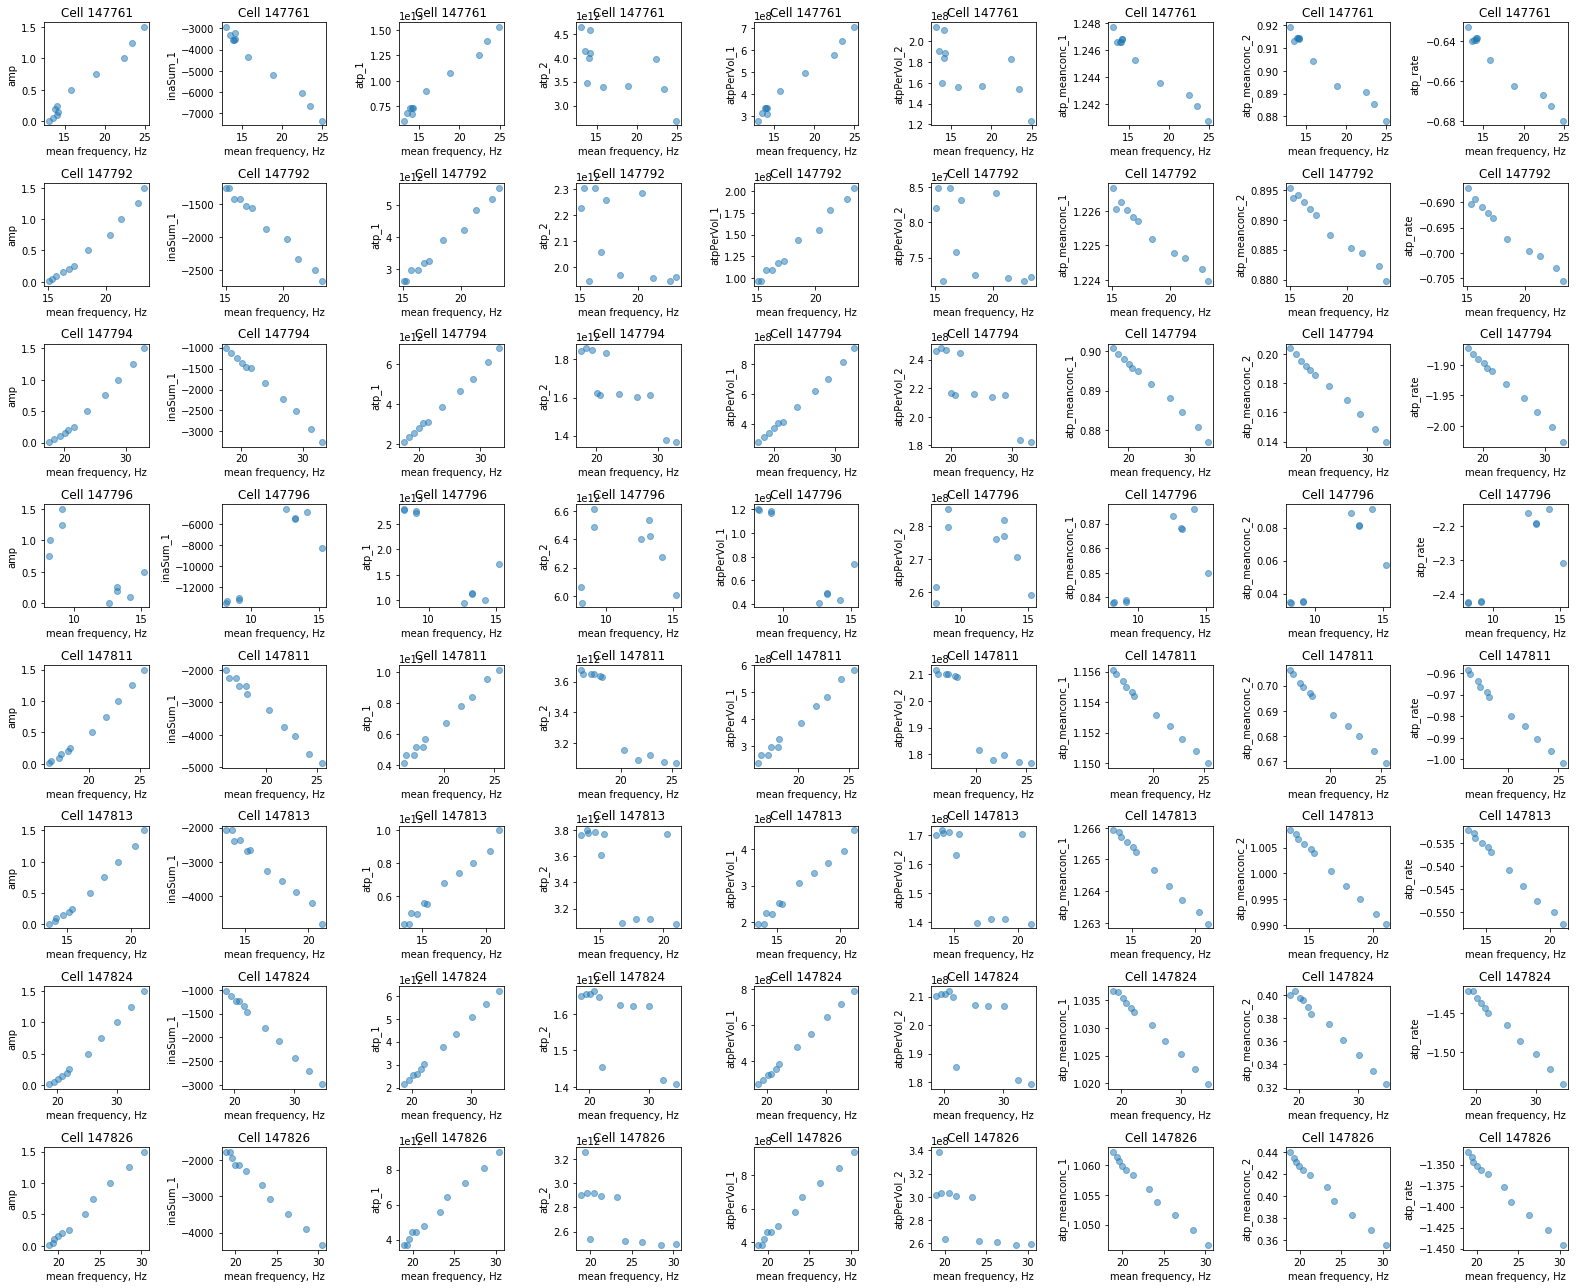

In [46]:
fig, axs = plt.subplots(8,9,figsize=(22,18))

for i,c in enumerate(['amp','inaSum_1','atp_1','atp_2','atpPerVol_1','atpPerVol_2','atp_meanconc_1','atp_meanconc_2','atp_rate']):
        
    x = i % 9
     
    for j,gids in enumerate(df.loc[df['etype']=='cADpyr','gid'][0:8]):
        
        y = j % 8
        
        axs[y, x].plot(df.loc[df['gid']==gids,'mean_frequency'],df.loc[df['gid']==gids,c], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
        axs[y, x].set_title(f'Cell {gids}')
        axs[y, x].set(xlabel='mean frequency, Hz', ylabel=c)

fig.tight_layout()

In [47]:
groups = df.loc[df['etype']!='cADpyr',:].groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['amp'], group['atp_rate'], marker='.', linestyle='', ms=12, label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('amp')
ax.set_ylabel('atp rate') 

plt.show()


In [48]:
groups = df.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['mean_frequency'], group['atp_rate'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('mean_frequency')
ax.set_ylabel('atp_rate') 

plt.show()


In [49]:
groups = df.groupby('etype')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['mean_frequency'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('mean_frequency')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


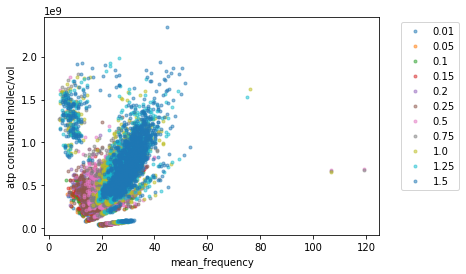

In [50]:
groups = df.loc[df['etype']=='cADpyr',:].groupby('amp')

fig, ax = plt.subplots()
ax.margins(0.05) # Optional, just adds 5% padding to the autoscaling

for name, group in groups:
    ax.plot(group['mean_frequency'], group['atpPerVol_1'], marker='.', linestyle='',label=name, alpha=0.5)
ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

ax.set_xlabel('mean_frequency')
ax.set_ylabel('atp consumed molec/vol') 

plt.show()


In [51]:
df.columns

Index(['gid', 'cells_volumes_um3', 'cells_areas', 'atp_1', 'inaSum_1', 'atp_2',
       'inaSum_2', 'x', 'y', 'z', 'synapse_class', 'layer', 'etype', 'mtype',
       'etype_mtype', 'atp_meanconc_1', 'atp_meanconc_2', 'amp', 'atpPerVol_1',
       'atpPerVol_2', 'AP_height', 'AP_duration', 'mean_frequency',
       'AHP_depth', 'AHP_time_from_peak', 'voltage_base',
       'time_to_first_spike', 'time_to_last_spike', 'ISI_CV', 'ISI_log_slope',
       'inv_first_ISI', 'inv_second_ISI', 'inv_third_ISI', 'inv_fourth_ISI',
       'inv_fifth_ISI', 'inv_last_ISI', 'AP_amplitude',
       'AP_duration_half_width', 'AHP_depth_abs', 'Spikecount',
       'amp_drop_first_last', 'irregularity_index', 'max_amp_difference',
       'maximum_voltage', 'peak_voltage', 'spike_half_width',
       'mean_AP_amplitude', 'atp_rate'],
      dtype='object')

In [52]:
#'synapse_class', 'layer', 'etype', 'mtype', 'etype_mtype',

In [53]:
df2 = df.loc[:,['gid','synapse_class', 'layer', 'etype', 'mtype', 'etype_mtype']].copy()
df2 = df2.drop_duplicates(keep='first')
df2 = df2.reset_index(drop=True)

In [54]:
df2['pearson'] = None

In [55]:
df2['pearson_conc'] = None

In [56]:
df2['pearson_conc_diff'] = None

In [57]:
for i,gid in enumerate(df2['gid'].unique()):
    pr = np.corrcoef(df.loc[df['gid']==gid,'mean_frequency'], df.loc[df['gid']==gid,'atpPerVol_1'],'pearson')[0][1]
    df2.loc[df2['gid']==gid,'pearson'] = pr*100

In [62]:
for i,gid in enumerate(df2['gid'].unique()):
    pr = np.corrcoef(df.loc[df['gid']==gid,'mean_frequency'],1.4-df.loc[df['gid']==gid,'atp_meanconc_1'],'pearson_conc')[0][1]
    df2.loc[df2['gid']==gid,'pearson_conc'] = pr*100

In [58]:
for i,gid in enumerate(df2['gid'].unique()):
    pr = np.corrcoef(df.loc[df['gid']==gid,'mean_frequency'],1.4-df.loc[df['gid']==gid,'atp_meanconc_1'],'pearson_conc_diff')[0][1]
    df2.loc[df2['gid']==gid,'pearson_conc_diff'] = pr*100

In [63]:
df2.head()

gid synapse_class  layer   etype     mtype      etype_mtype  pearson  \
0  147761           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A  99.3183   
1  147792           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A  99.4931   
2  147794           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A  99.8301   
3  147796           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A -87.7058   
4  147811           EXC      5  cADpyr  L5_TPC:A  cADpyr_L5_TPC:A  99.6795   

  pearson_conc pearson_conc_diff  
0      98.8712           98.8712  
1      98.5423           98.5423  
2      99.8218           99.8218  
3     -78.9798          -78.9798  
4      99.8452           99.8452

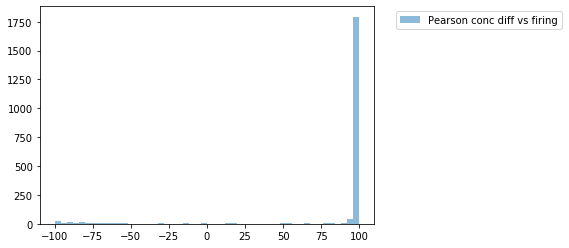

In [60]:

# gen met
bins = 50 #numpy.linspace(min(), 10, 100)

plt.hist(df2['pearson_conc_diff'], bins=bins, alpha=0.5, label='Pearson conc diff vs firing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

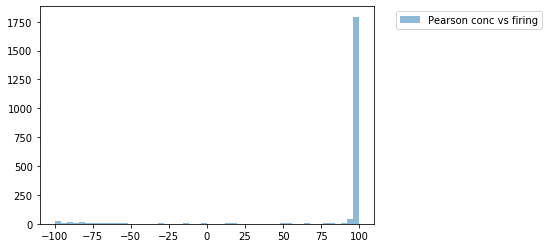

In [64]:
# gen met
bins = 50 #numpy.linspace(min(), 10, 100)

plt.hist(df2['pearson_conc'], bins=bins, alpha=0.5, label='Pearson conc vs firing')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

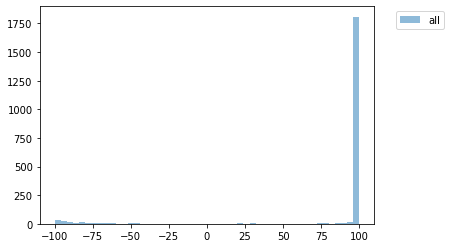

In [65]:
# gen met
bins = 50 #numpy.linspace(min(), 10, 100)

plt.hist(df2['pearson'], bins=bins, alpha=0.5, label='all')
#plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
#plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

#plt.legend(loc='upper right')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

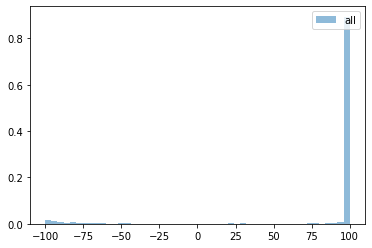

In [66]:
# gen met
bins = 50 #numpy.linspace(min(), 10, 100)

plt.hist(df2['pearson'], weights=np.ones(len(df2['pearson'])) / len(df2['pearson']), bins=bins, alpha=0.5, label='all')
#plt.hist(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='bSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='bSTUT')
#plt.hist(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'], weights=np.ones(len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency'])) / len(combo2.loc[combo2['etype']=='cSTUT','mean_frequency']),  bins=bins, alpha=0.95, label='cSTUT')

plt.legend(loc='upper right')
plt.show()

In [74]:
cpr = np.corrcoef(df.loc[df['gid']==147761,'mean_frequency'], df.loc[df['gid']==147761,'atpPerVol_1'],'pearson')[0][1]


In [65]:
np.corrcoef(df.loc[df['etype']=='cADpyr','mean_frequency'], df.loc[df['etype']=='cADpyr','atpPerVol_1'],'pearson')


array([[1.        , 0.43151033],
       [0.43151033, 1.        ]])

In [50]:
df['atp_rate'].head(10)

0   -0.632961
1   -0.687109
2   -1.872948
3   -2.161283
4   -0.958423
5   -0.532239
6   -1.422305
7   -1.334517
8   -1.829779
9   -1.297117
Name: atp_rate, dtype: float64

In [51]:
df['atp_rate'].max()

-0.06727433204650879

In [52]:
df['atp_rate'].min()

-2.7929658461362123

In [105]:

atp_t = ATPConcAllCmps.transpose()
atp_t.columns = atp_t.loc['time',:]
atp_t.drop(atp_t.index[0], inplace=True)

atp_t = atp_t.reset_index()

atp_mean = atp_t.loc[:,['gid']].copy()
atp_mean['atp_rate']  = (atp_t.iloc[:,500] - atp_t.iloc[:,1])/0.5

In [103]:
atp_t.iloc[:,500]

0       0.989228
1       1.079778
2       1.068923
3       0.919254
4       0.864808
          ...   
2127    0.535289
2128    0.273995
2129    0.807030
2130    0.900650
2131    0.654863
Name: 499.0, Length: 2132, dtype: float64

In [106]:
atp_t.iloc[:,1]

0       1.399999
1       1.399999
2       1.399999
3       1.399999
4       1.399999
          ...   
2127    1.399999
2128    1.399999
2129    1.399999
2130    1.399999
2131    1.399999
Name: 0.0, Length: 2132, dtype: float64

In [102]:
atp_mean.head()

time     gid       atp_rate
0     147760 -295518.021545
1     147761 -295519.840444
2     147789 -295575.862154
3     147792 -295582.161492
4     147794 -295586.270384

In [100]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('ATPConcAllCmps', source='h5') 
ATPConcAllCmps = report.get()
print("NUMBER OF COLUMNS:",len(ATPConcAllCmps.columns))

ATPConcAllCmps = ATPConcAllCmps.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


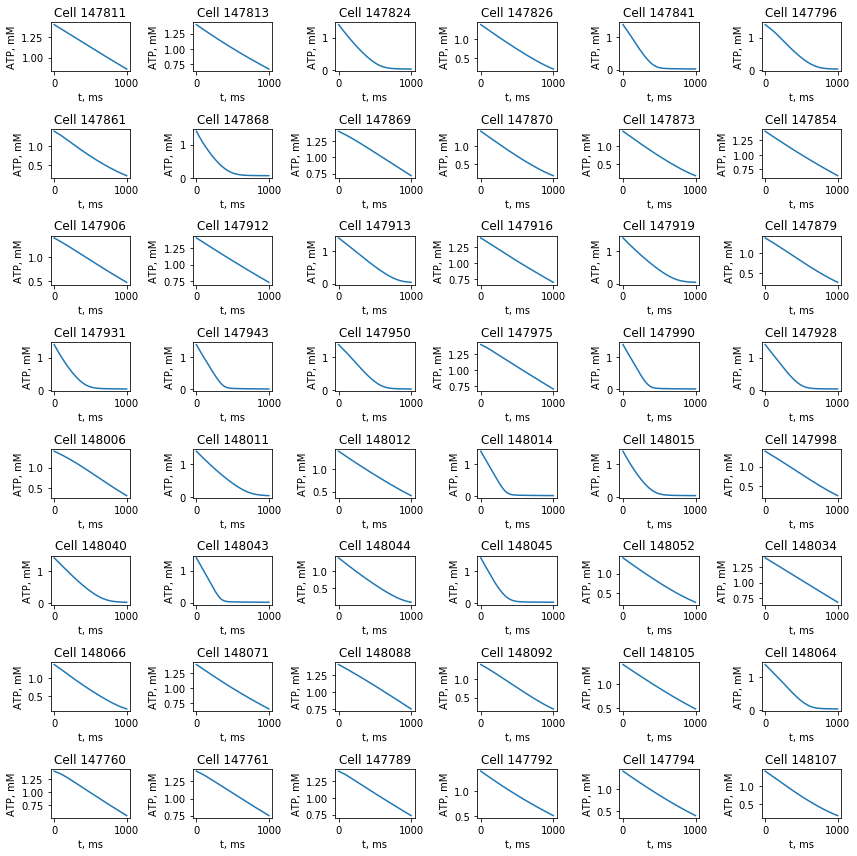

In [105]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ATPConcAllCmps.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ATPConcAllCmps['time'],ATPConcAllCmps[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

In [114]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp4/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('ATPConcAllCmps', source='h5') 
ATPConcAllCmps200 = report.get()
print("NUMBER OF COLUMNS:",len(ATPConcAllCmps200.columns))

ATPConcAllCmps200 = ATPConcAllCmps200.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


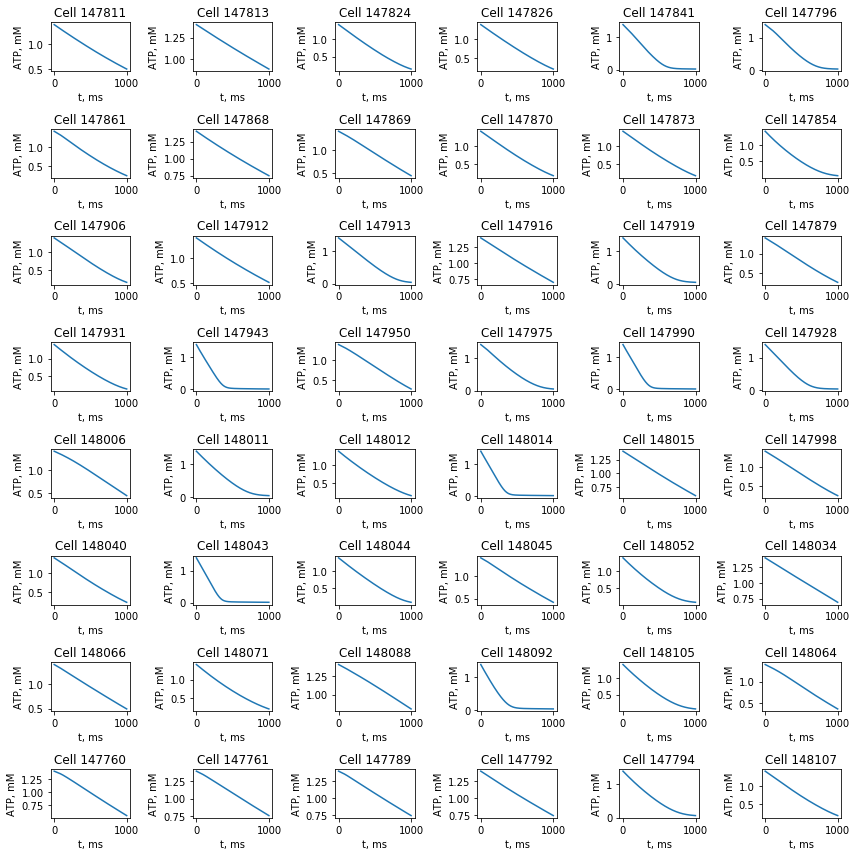

In [115]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(ATPConcAllCmps200.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(ATPConcAllCmps200['time'],ATPConcAllCmps200[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='ATP, mM')

fig.tight_layout()

In [106]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp1/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('soma', source='h5') 
soma = report.get()
print("NUMBER OF COLUMNS:",len(soma.columns))

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


In [108]:
soma = soma.reset_index()

In [109]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(soma.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(soma['time'],soma[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

In [112]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp4/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('soma', source='h5') 
soma50 = report.get()

print("NUMBER OF COLUMNS:",len(soma200.columns))

soma50 = soma50.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2133


In [113]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(soma50.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(soma50['time'],soma50[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()

In [110]:
sim_f = '/gpfs/bbp.cscs.ch/project/proj34/sh_ngvm/column/diff_pulses/amp3/BlueConfig'
sim = Simulation(sim_f)

report = sim.report('soma', source='h5') 
soma200 = report.get()

print("NUMBER OF COLUMNS:",len(soma200.columns))

soma200 = soma200.reset_index()

Have keys ({'FlushBufferScalar'}) that are not defined for section: Run
Ignoring unknown key: 'FlushBufferScalar'


NUMBER OF COLUMNS: 2132


In [111]:
fig, axs = plt.subplots(8,6,figsize=(12,12))

for i,c in enumerate(soma200.iloc[:,0:49].columns):
    if i == 0:
        continue
    x = i % 6 -1
    y = i // 6 -1
    axs[y, x].plot(soma200['time'],soma200[c])
    axs[y, x].set_title(f'Cell {c}')

for ax in axs.flat:
    ax.set(xlabel='t, ms', ylabel='soma V, mV')

fig.tight_layout()